In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
leases = pd.read_csv("Leases-Revised.csv")
major_market = pd.read_csv("Major Market Occupancy Data-revised.csv")
major_market = major_market.dropna()
leases = leases.dropna()
unemployment = pd.read_csv("Unemployment.csv")

In [5]:
new = pd.read_csv("new_new_leases.csv")

In [6]:
new = new.dropna()

# CBD/Suburban Binary Response

## LogReg for Odds

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
new[['year_new']] = new[['year']] - 2018

In [8]:
industries_to_keep = ['Legal Services', 'Technology, Advertising, Media, and Information', 'Financial Services and Insurance']

# Filter the dataframe
new = new[new['internal_industry'].isin(industries_to_keep)]

In [10]:
X_lr = new[['year','qtr_mortgage', 'avg_unemploy', 'cbd_dist_km', 'leasing','RBA','space_type', 'transaction_type','availability_proportion','available_space',  'internal_class', 'overall_rent',  'direct_available_space','direct_availability_proportion','direct_internal_class_rent' , 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_overall_rent', 'internal_industry'  ]]

In [11]:
X_lr = pd.get_dummies(X_lr)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lr)

In [13]:
y_lr = new[['CBD_suburban']]

In [14]:
# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=4)

In [827]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/allielynn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [803]:
coefs = logreg.coef_[0] 

# intercept
intercept = logreg.intercept_[0]

In [804]:
coefs

array([ 4.30806186e-10,  1.05088053e-12,  7.03470947e-13,  5.43132930e-12,
        3.30488289e-09,  4.61773759e-09,  4.35191069e-14, -4.05350131e-08,
        5.39361741e-12,  7.38871221e-08,  1.64595914e-14,  4.37602861e-12,
        5.28604097e-12, -1.14422135e-07,  3.17982000e-15,  5.06346886e-12,
        1.12317996e-13, -7.70981348e-14,  1.77889135e-13,  4.93791596e-14,
        1.63729837e-13,  9.56847491e-14,  1.17424248e-13,  3.62429241e-14,
        5.64761229e-14,  1.20389950e-13])

In [805]:
intercept

2.1310899687290806e-13

In [806]:
p = logreg.predict_proba(X_test)[:,1]

In [807]:
p

array([0.59574953, 0.74101689, 0.53860959, ..., 0.58432572, 0.645582  ,
       0.63707955])

In [808]:
# Show for a few examples
odds = p / (1 - p)
for i in range(5):
    print(f"Example {i+1}:")
    print(f"Probability CBD: {p[i]:.4f}")
    print(f"Probability Suburban: {1 - p[i]:.4f}")
    print(f"Odds (p / (1-p)): {odds[i]:.4f}")
    print()

Example 1:
Probability CBD: 0.5957
Probability Suburban: 0.4043
Odds (p / (1-p)): 1.4737

Example 2:
Probability CBD: 0.7410
Probability Suburban: 0.2590
Odds (p / (1-p)): 2.8613

Example 3:
Probability CBD: 0.5386
Probability Suburban: 0.4614
Odds (p / (1-p)): 1.1674

Example 4:
Probability CBD: 0.7047
Probability Suburban: 0.2953
Odds (p / (1-p)): 2.3861

Example 5:
Probability CBD: 0.6456
Probability Suburban: 0.3544
Odds (p / (1-p)): 1.8215



In [809]:
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6554

Confusion Matrix:
[[  2 342]
 [  4 656]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.01      0.01       344
         1.0       0.66      0.99      0.79       660

    accuracy                           0.66      1004
   macro avg       0.50      0.50      0.40      1004
weighted avg       0.55      0.66      0.52      1004



In [810]:
coefs = logreg.coef_[0]        # coefficients array
features = X_train.columns     # feature names

# Calculate odds ratios
import numpy as np
odds_ratios = np.exp(coefs)

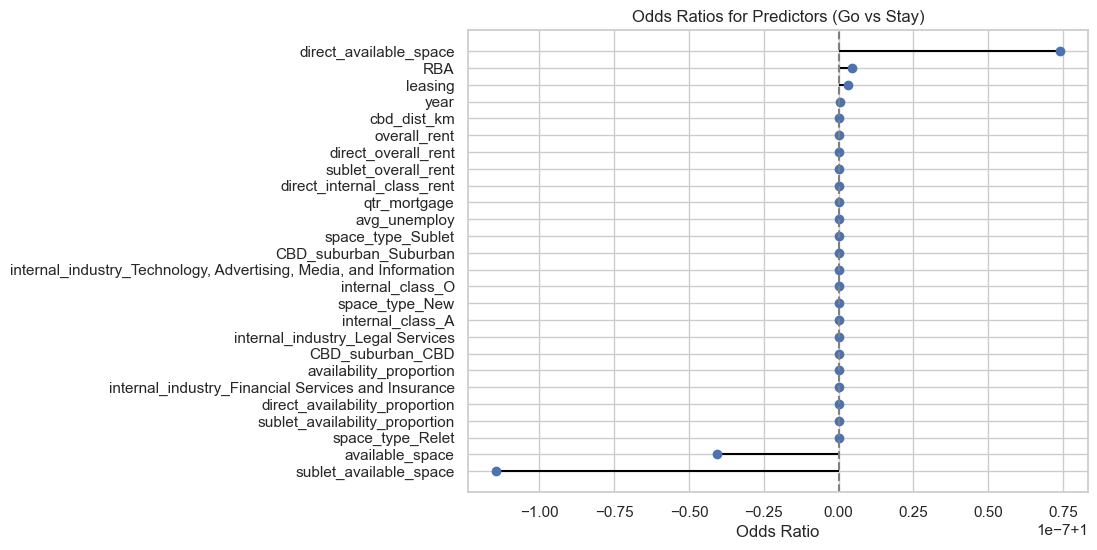

In [812]:
import matplotlib.pyplot as plt

# Sort predictors by odds ratio 
sorted_idx = np.argsort(odds_ratios)

# Plot
plt.figure(figsize=(8, 6))
plt.hlines(y=np.arange(len(features)), xmin=1, xmax=odds_ratios[sorted_idx], color='black')
plt.plot(odds_ratios[sorted_idx], np.arange(len(features)), 'o')

# Reference line at odds ratio = 1
plt.axvline(x=1, color='gray', linestyle='--')

# Y-ticks and labels
plt.yticks(np.arange(len(features)), features[sorted_idx])

plt.xlabel('Odds Ratio')
plt.title('Odds Ratios for Predictors (Go vs Stay)')
plt.grid(True, axis='x')
plt.show()

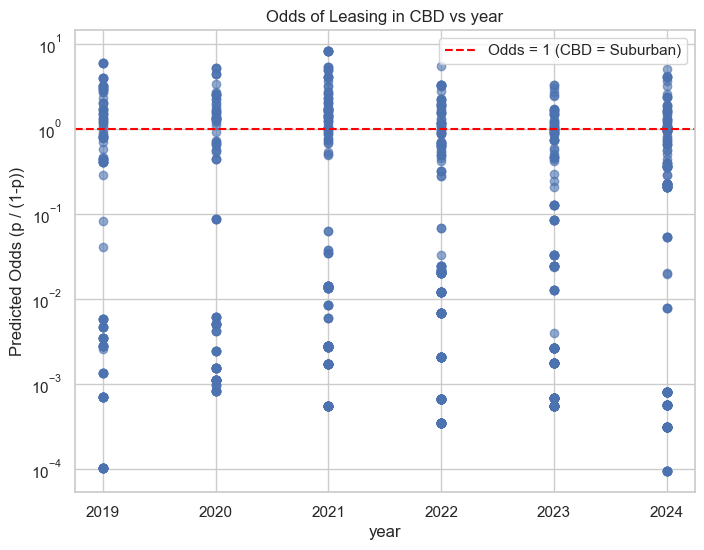

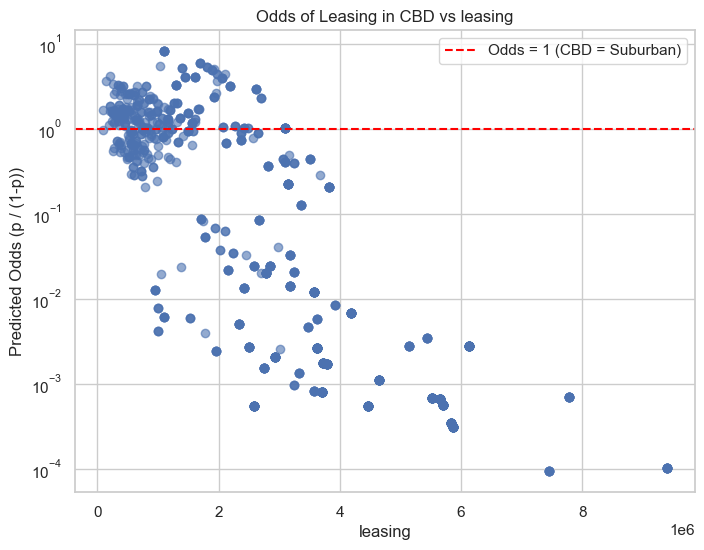

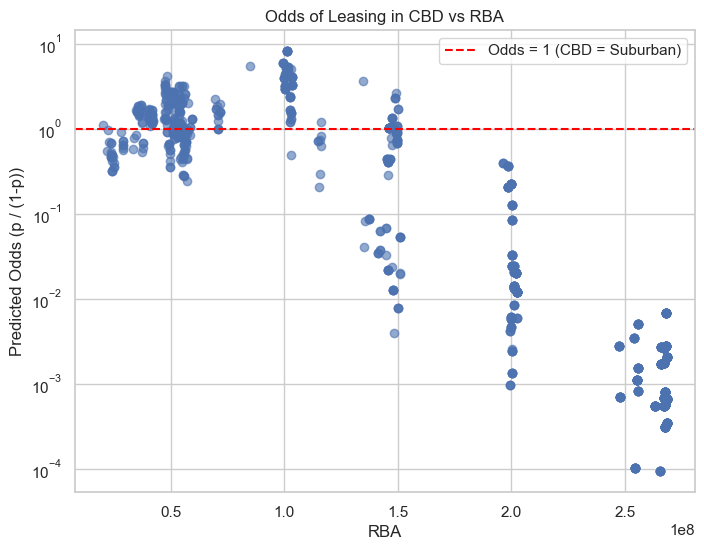

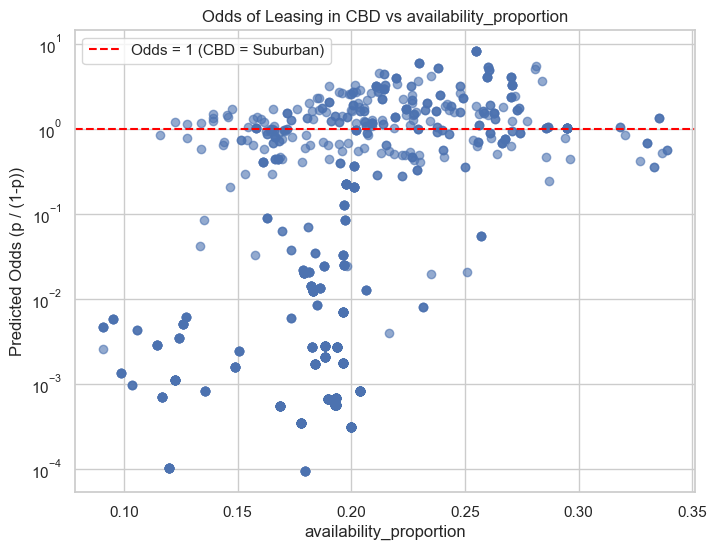

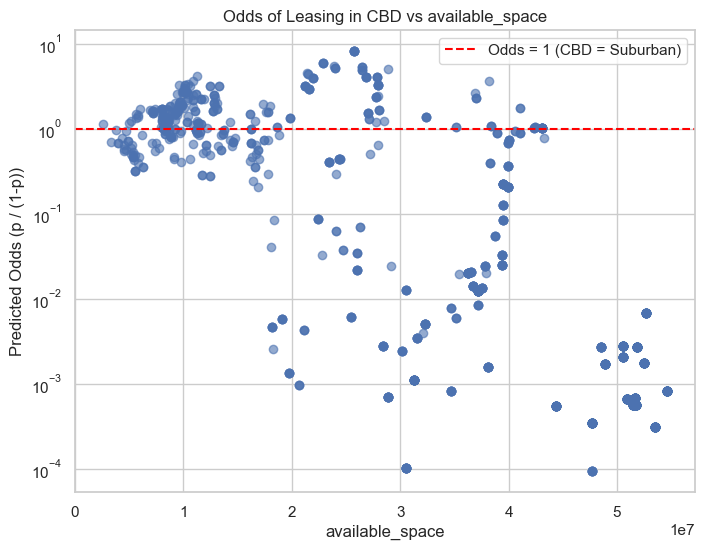

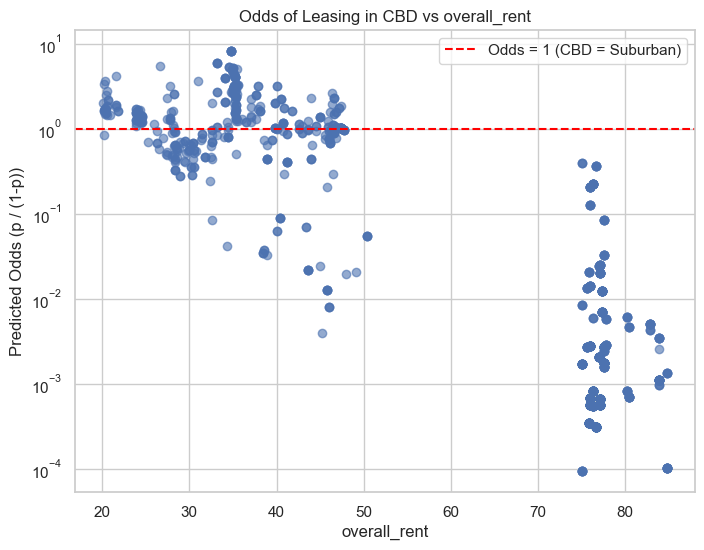

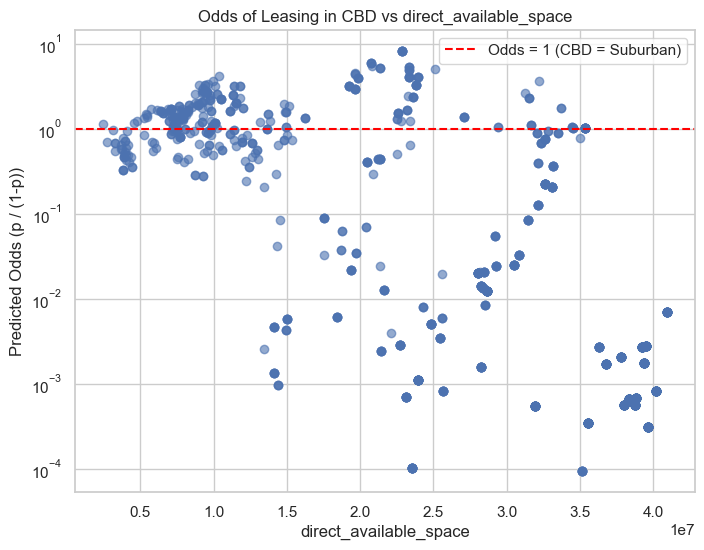

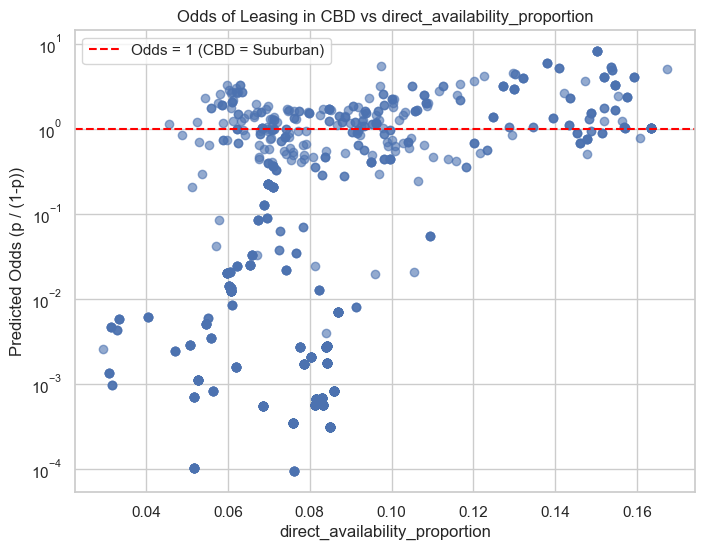

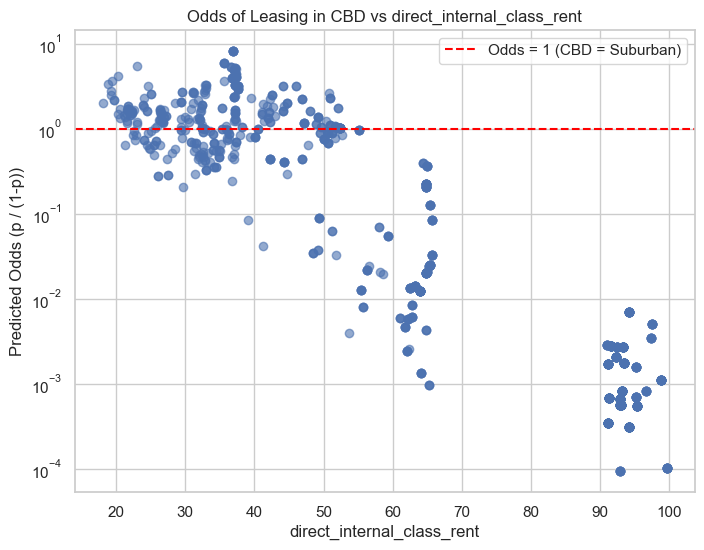

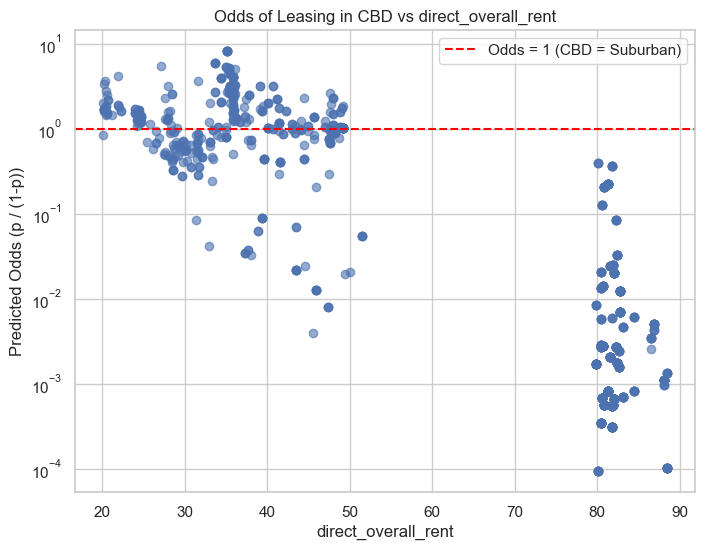

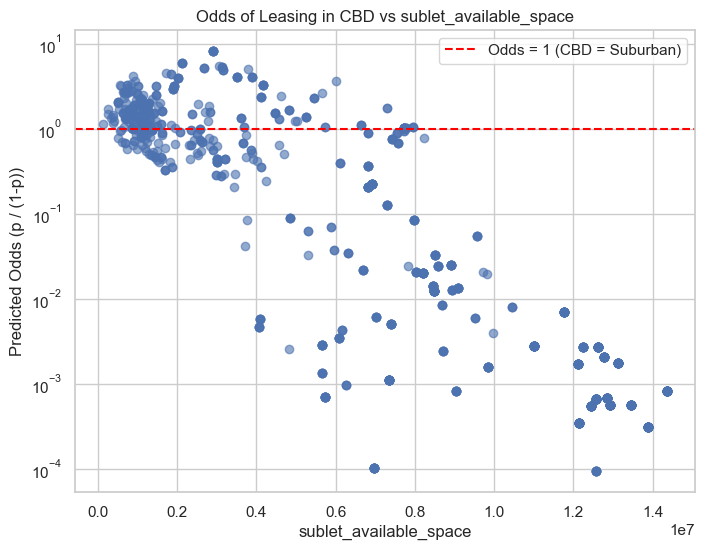

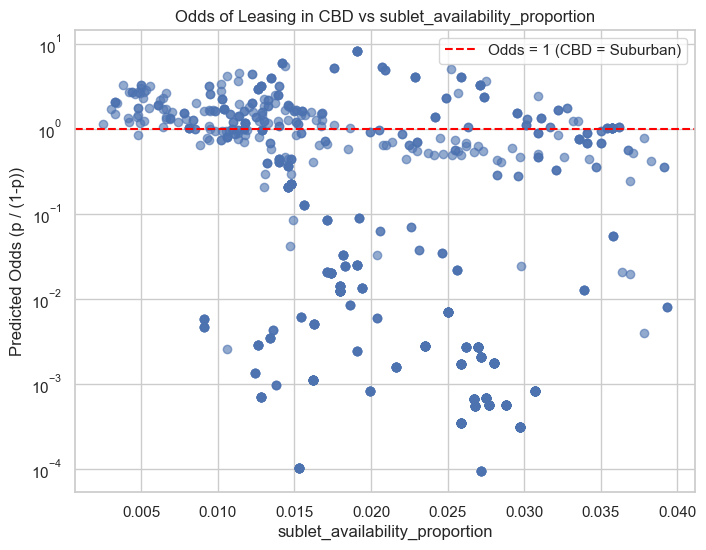

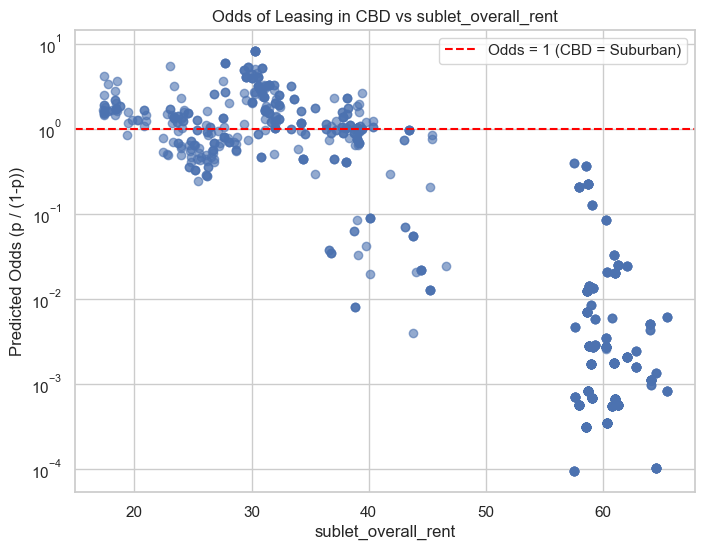

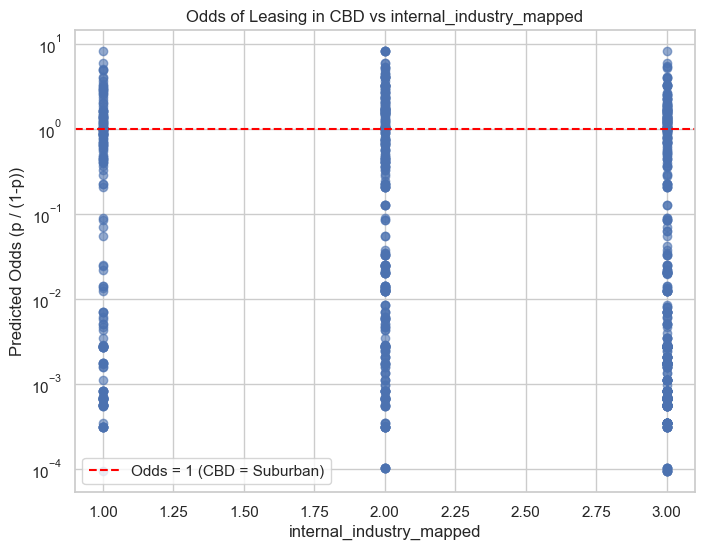

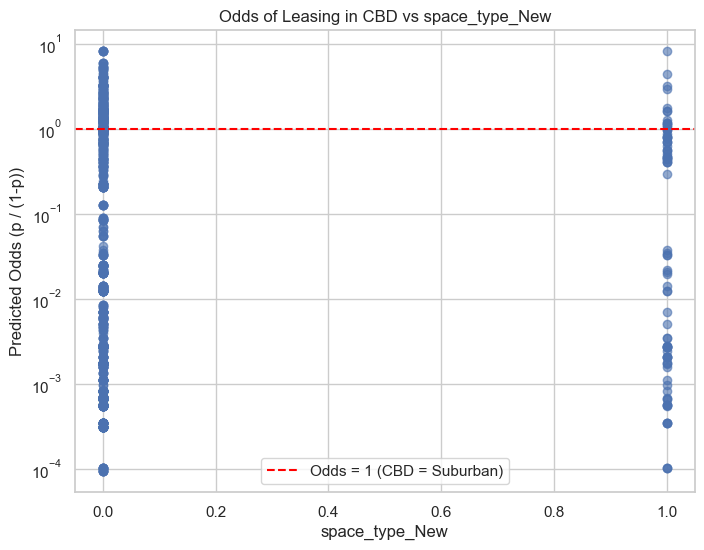

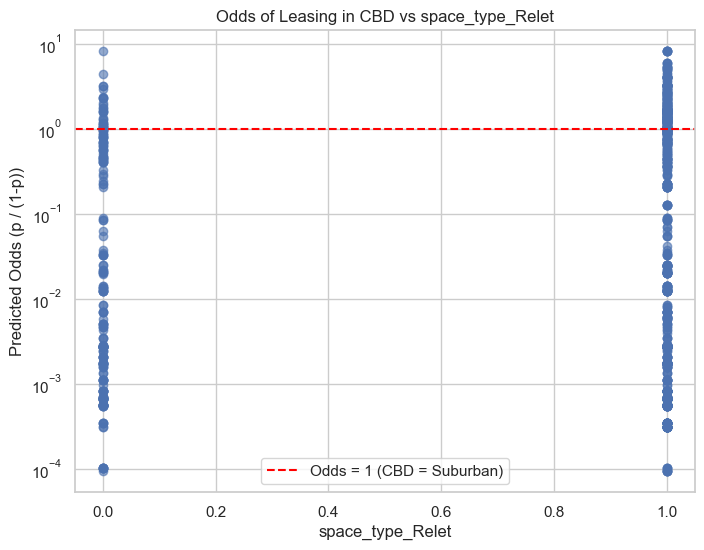

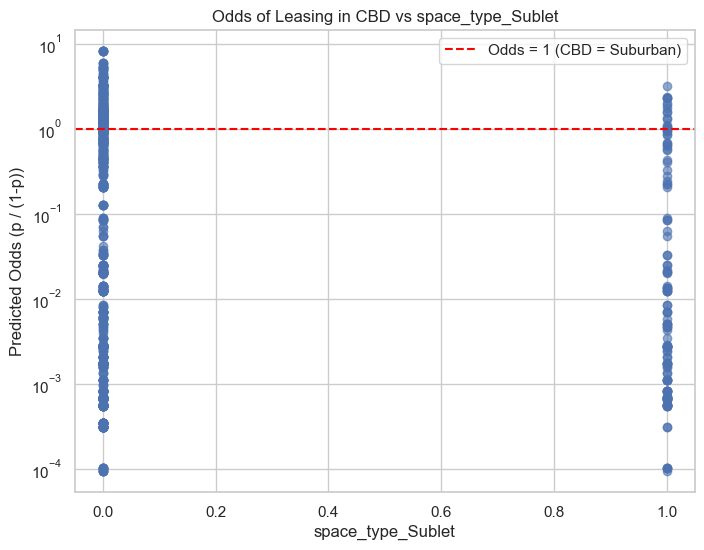

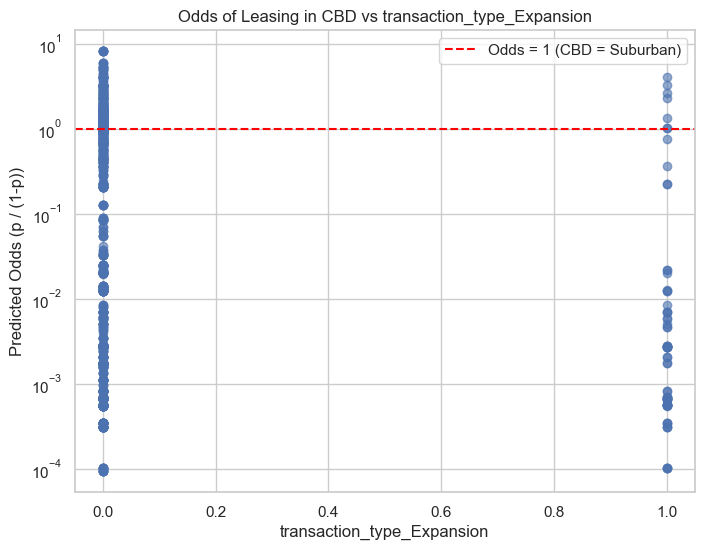

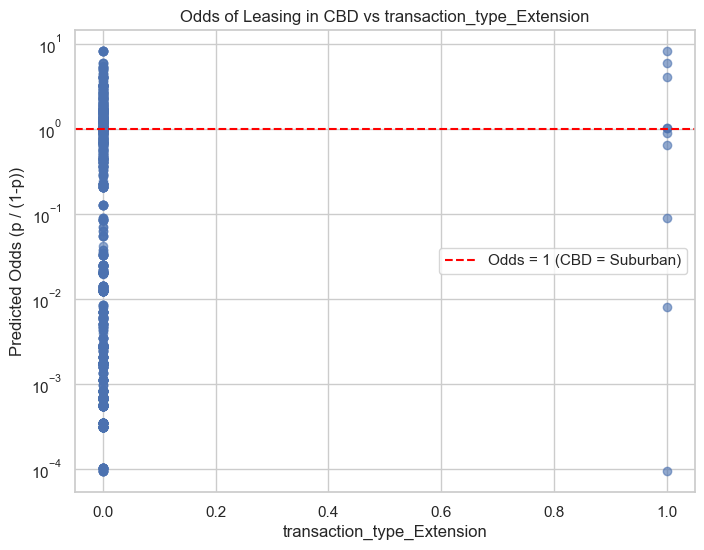

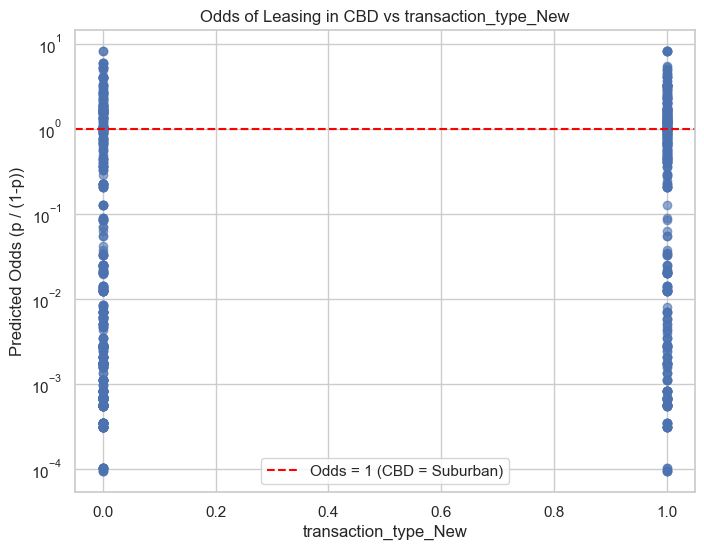

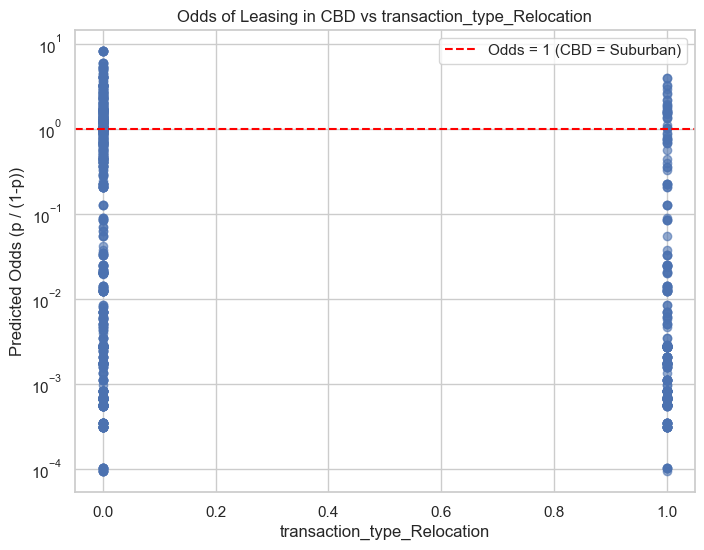

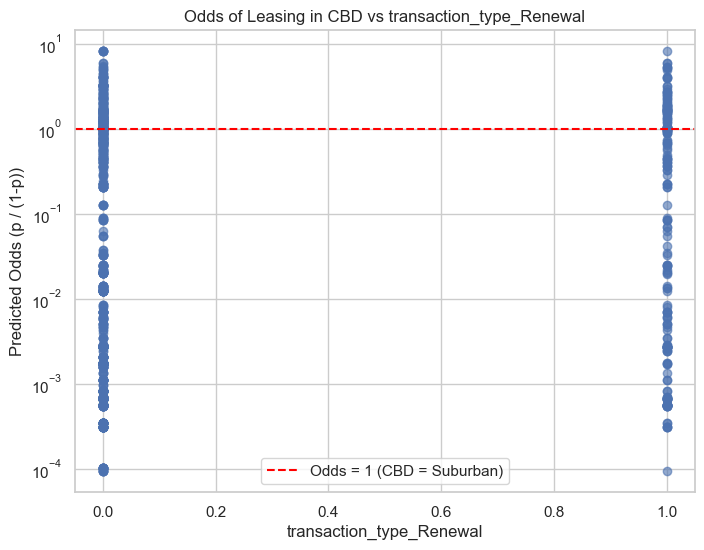

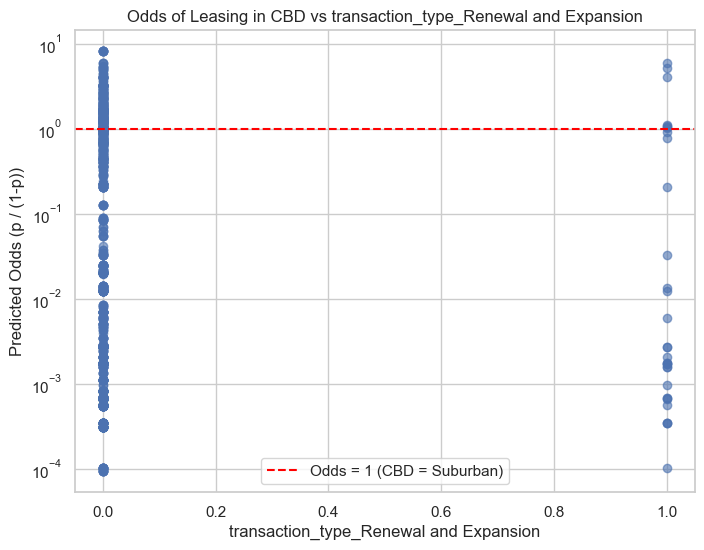

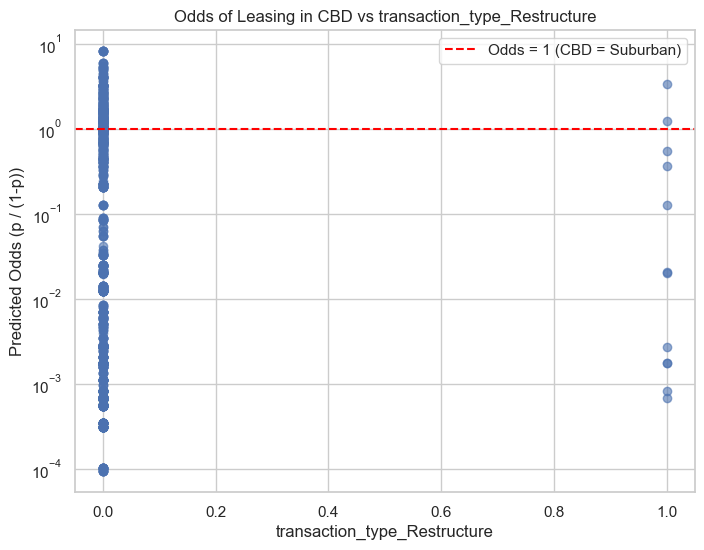

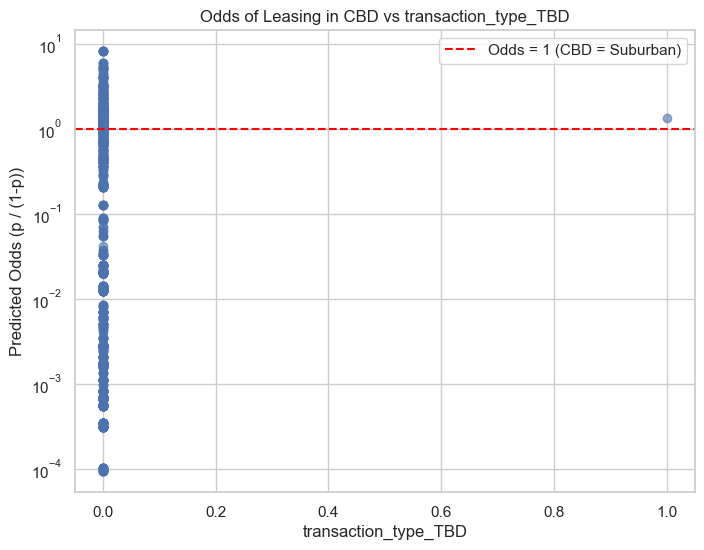

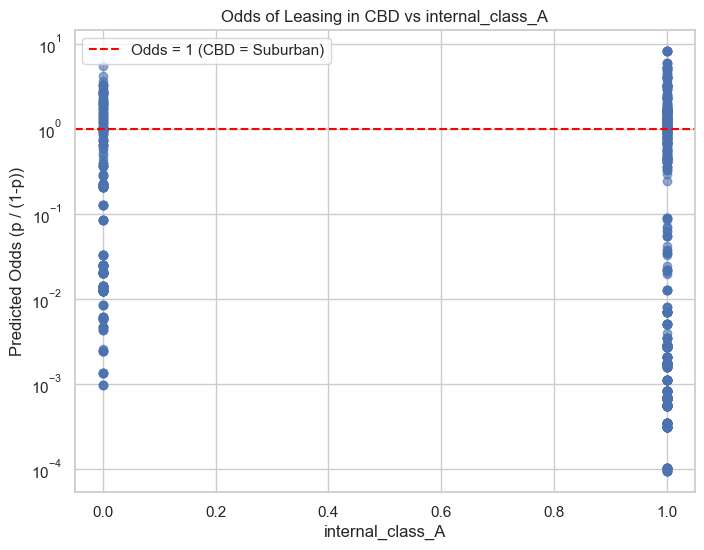

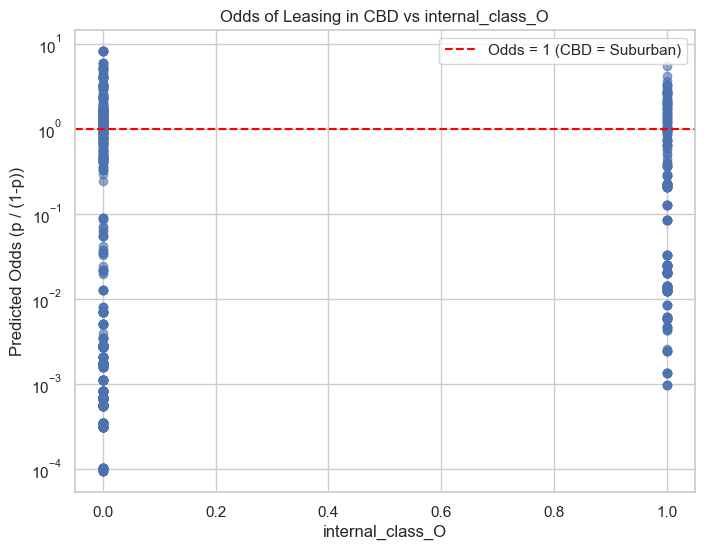

In [711]:
import matplotlib.pyplot as plt

# List of predictors 
predictor_list = X_test.columns

# Loop through predictors
for predictor in predictor_list:
    plt.figure(figsize=(8,6))
    
    plt.scatter(X_test[predictor], odds, alpha=0.6)
    plt.axhline(y=1, color='red', linestyle='--', label='Odds = 1 (CBD = Suburban)')
    
    plt.xlabel(predictor)
    plt.ylabel('Predicted Odds (p / (1-p))')
    plt.title(f'Odds of Leasing in CBD vs {predictor}')
    plt.yscale('log')  # log odds
    plt.grid(True)
    plt.legend()
    plt.show()


## W lasso

In [15]:
from sklearn.linear_model import LogisticRegression

logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear')  # liblinear supports L1 penalty
logreg_lasso.fit(X_train, y_train)

/Users/allielynn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='liblinear')

In [16]:
coefs_lasso = logreg_lasso.coef_[0]  

# intercept
intercept_lasso = logreg_lasso.intercept_[0]

In [17]:
coefs_lasso

array([ 1.99495034e-03, -8.67611084e-02, -1.15114615e-01,  8.10868412e-02,
       -2.01977342e-07, -8.05696042e-09,  0.00000000e+00,  6.19840042e-08,
       -3.08089423e-02,  1.11051306e-07,  0.00000000e+00, -1.00823463e-02,
       -1.12249337e-01, -2.00272452e-07,  0.00000000e+00,  1.10710940e-03,
       -8.81426633e-01,  0.00000000e+00,  7.36038494e-02,  0.00000000e+00,
        0.00000000e+00,  3.47573155e-01, -5.43455561e-01,  2.22618864e-01,
        0.00000000e+00,  0.00000000e+00,  4.39626372e-02,  0.00000000e+00,
        9.80205310e-01,  0.00000000e+00, -8.10699313e-01,  2.61437674e-01])

In [18]:
y_pred_lasso = logreg_lasso.predict(X_test)
acc = accuracy_score(y_test, y_pred_lasso)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lasso)
print("\nConfusion Matrix:")
print(cm)

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lasso))

Accuracy: 0.9008

Confusion Matrix:
[[686  52]
 [ 48 222]]

Classification Report:
              precision    recall  f1-score   support

         CBD       0.93      0.93      0.93       738
    Suburban       0.81      0.82      0.82       270

    accuracy                           0.90      1008
   macro avg       0.87      0.88      0.87      1008
weighted avg       0.90      0.90      0.90      1008



In [19]:
coefs_lasso = logreg_lasso.coef_[0]        # coefficients array
features_lasso = X_train.columns     # feature names

# Calculate odds ratios
import numpy as np
odds_ratios_lasso = np.exp(coefs_lasso)

In [20]:
features = X_train.columns

In [21]:
# After fitting
coefs = logreg_lasso.coef_[0]


features = X_train.columns  

# match features to coefs
if len(features) == len(coefs):
    lasso_results = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefs
    })

    selected_predictors = lasso_results[lasso_results['Coefficient'] != 0]
    print(selected_predictors)
else:
    print(f"Mismatch! Features: {len(features)}, Coefficients: {len(coefs)}")


                                              Feature   Coefficient
0                                                year  1.994950e-03
1                                        qtr_mortgage -8.676111e-02
2                                        avg_unemploy -1.151146e-01
3                                         cbd_dist_km  8.108684e-02
4                                             leasing -2.019773e-07
5                                                 RBA -8.056960e-09
7                                     available_space  6.198400e-08
8                                        overall_rent -3.080894e-02
9                              direct_available_space  1.110513e-07
11                         direct_internal_class_rent -1.008235e-02
12                                direct_overall_rent -1.122493e-01
13                             sublet_available_space -2.002725e-07
15                                sublet_overall_rent  1.107109e-03
16                                     space_typ

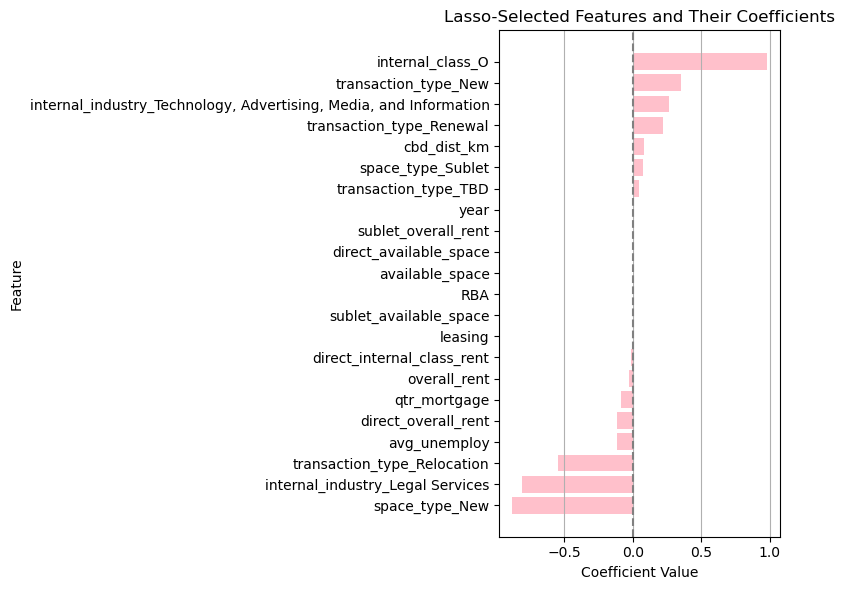

In [22]:
import matplotlib.pyplot as plt

# Sort by coef value
selected_predictors = selected_predictors.sort_values(by='Coefficient', ascending=True)

# horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(
    selected_predictors['Feature'], 
    selected_predictors['Coefficient'], 
    color='pink'
)

plt.axvline(x=0, color='gray', linestyle='--')  # Add a line at 0
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso-Selected Features and Their Coefficients')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


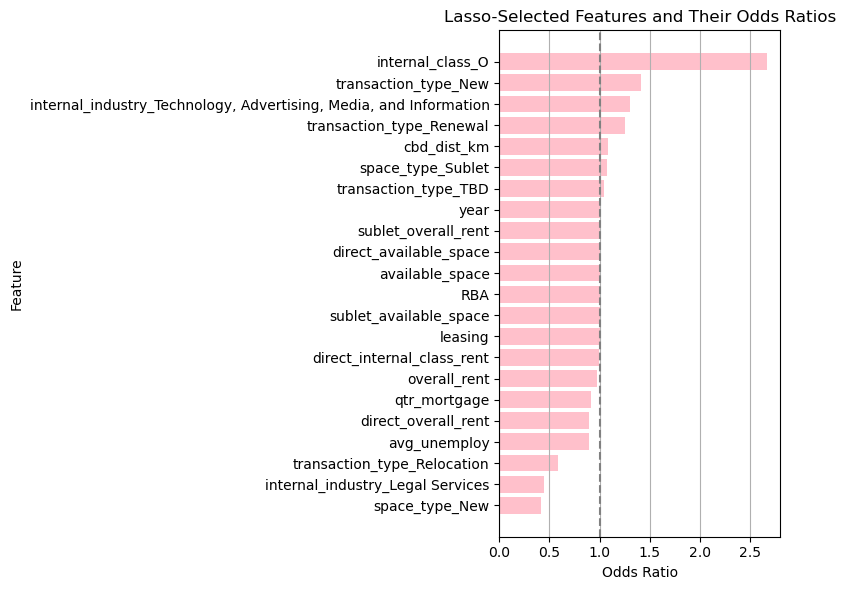

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sort predictors by odds ratio
selected_predictors = selected_predictors.sort_values(by='Coefficient', ascending=True)

# Calculate odds ratios
selected_predictors['Odds Ratio'] = np.exp(selected_predictors['Coefficient'])

# plot odds ratios instead of raw coefficients
plt.figure(figsize=(8, 6))
plt.barh(
    selected_predictors['Feature'], 
    selected_predictors['Odds Ratio'], 
    color='pink'
)

# Add vertical line at Odds Ratio = 1 (no effect)
plt.axvline(x=1, color='gray', linestyle='--')

plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Lasso-Selected Features and Their Odds Ratios')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


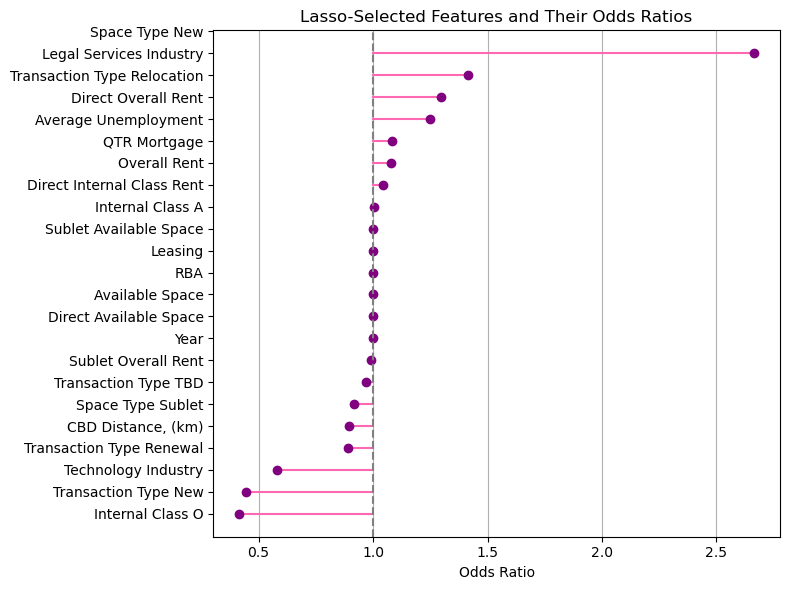

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#labels = ['Internal Class O', 'Transaction Type New', 'Transaction Type Renewal', 'Transaction Type Expansion'
       #  'Technology Industry', 'Space Type Relet', 'CBD Distance (km)', 'Sublet Overall Rent', 
       #  'Year', 'Direct Available Space', 'Available Space', 'RBA', 'Leasing', 'Sublet Available Space',
       #  'Direct Internal Class Rent', 'Transaction Type Renewal and Expansion', 'Overall Rent', 'QTR Mortgage', 'Average Unemployment',
       #  'Direct Overall Rent', 'Transaction Type Relocation', 'Space Type New', 'Legal Services Industry',
       #  'Transaction Type Extension']
    
labels = ['Internal Class O', 'Transaction Type New', 'Technology Industry', 'Transaction Type Renewal', 
         'CBD Distance, (km)', 'Space Type Sublet', 'Transaction Type TBD', 'Sublet Overall Rent', 
         'Year', 'Direct Available Space', 'Available Space', 'RBA', 'Leasing', 'Sublet Available Space',
         'Internal Class A', 'Direct Internal Class Rent', 'Overall Rent', 'QTR Mortgage', 'Average Unemployment',
         'Direct Overall Rent', 'Transaction Type Relocation', 'Legal Services Industry', 'Space Type New']

# Sort predictors by odds ratio 
selected_predictors = selected_predictors.sort_values(by='Coefficient', ascending=True)

# Calculate odds ratios
selected_predictors['Odds Ratio'] = np.exp(selected_predictors['Coefficient'])

# Start plotting
plt.figure(figsize=(8, 6))

# For each feature, plot a dot and a line to odds ratio = 1
for i, (feature, odds) in enumerate(zip(selected_predictors['Feature'], selected_predictors['Odds Ratio'])):
    plt.plot([1, odds], [i, i], color='hotpink')  # Line from 1 to the odds ratio
    plt.plot(odds, i, 'o', color='purple')       # Dot at the odds ratio

# Formatting
plt.axvline(x=1, color='gray', linestyle='--')  # Vertical reference at 1
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.xlabel('Odds Ratio')
plt.title('Lasso-Selected Features and Their Odds Ratios')
plt.grid(True, axis='x')
plt.tight_layout()

plt.savefig('lassoselectedandodds.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [868]:
coefs = logreg.coef_[0]        # coefficients array
features = X_train.columns     # feature names

# Calculate odds ratios
import numpy as np
odds_ratios = np.exp(coefs)

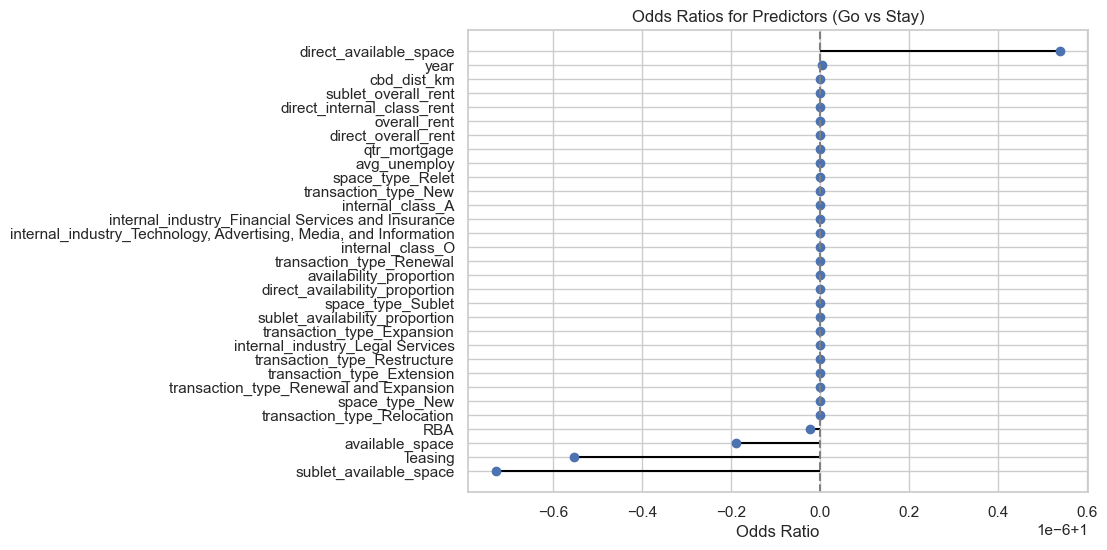

In [869]:
import matplotlib.pyplot as plt

# Sort predictors by odds ratio 
sorted_idx = np.argsort(odds_ratios)

# Plot
plt.figure(figsize=(8, 6))
plt.hlines(y=np.arange(len(features)), xmin=1, xmax=odds_ratios[sorted_idx], color='black')
plt.plot(odds_ratios[sorted_idx], np.arange(len(features)), 'o')

# Reference line at odds ratio = 1
plt.axvline(x=1, color='gray', linestyle='--')

# Y-ticks and labels
plt.yticks(np.arange(len(features)), features[sorted_idx])

plt.xlabel('Odds Ratio')
plt.title('Odds Ratios for Predictors (Go vs Stay)')
plt.grid(True, axis='x')
plt.show()

In [849]:
# squeeze it to Series first
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()

# Map strings to numeric 0/1
y_train_numeric = y_train.map({'Suburban': 0, 'CBD': 1})

# Check it's numeric
print(y_train_numeric.head())
print(y_train_numeric.dtype)

164788    0
130844    1
83305     1
140287    1
75275     1
Name: CBD_suburban, dtype: int64
int64


In [854]:
# Copy X_train
X_train_numeric = X_train.copy()

# Convert bools to ints
bool_cols = X_train_numeric.select_dtypes(include=['bool']).columns
X_train_numeric[bool_cols] = X_train_numeric[bool_cols].astype(int)

# Check if any object columns are left
print(X_train_numeric.dtypes)


year                                                                   int64
qtr_mortgage                                                         float64
avg_unemploy                                                         float64
cbd_dist_km                                                          float64
leasing                                                              float64
RBA                                                                  float64
availability_proportion                                              float64
available_space                                                      float64
overall_rent                                                         float64
direct_available_space                                               float64
direct_availability_proportion                                       float64
direct_internal_class_rent                                           float64
direct_overall_rent                                                  float64

In [851]:
print(X_train.dtypes)
X_train_numeric = X_train.copy()
bool_cols = X_train_numeric.select_dtypes(include=['bool']).columns
X_train_numeric[bool_cols] = X_train_numeric[bool_cols].astype(int)

year                                                                   int64
qtr_mortgage                                                         float64
avg_unemploy                                                         float64
cbd_dist_km                                                          float64
leasing                                                              float64
RBA                                                                  float64
availability_proportion                                              float64
available_space                                                      float64
overall_rent                                                         float64
direct_available_space                                               float64
direct_availability_proportion                                       float64
direct_internal_class_rent                                           float64
direct_overall_rent                                                  float64

In [856]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_numeric)


In [858]:
y_train_numeric

164788    0
130844    1
83305     1
140287    1
75275     1
         ..
120658    1
44842     1
143706    1
19720     1
77277     1
Name: CBD_suburban, Length: 2341, dtype: int64

In [859]:
X_train_sm

,const,year,qtr_mortgage,avg_unemploy,cbd_dist_km,leasing,RBA,availability_proportion,available_space,overall_rent,...,transaction_type_New,transaction_type_Relocation,transaction_type_Renewal,transaction_type_Renewal and Expansion,transaction_type_Restructure,internal_class_A,internal_class_O,internal_industry_Financial Services and Insurance,internal_industry_Legal Services,"internal_industry_Technology, Advertising, Media, and Information"
164788,1.0,2020,2.733333,6.491667,29.283557,1392894.0,100803477.0,0.238323,24023790.0,35.019003,...,True,False,False,False,False,True,False,False,False,True
130844,1.0,2022,5.850000,4.325000,2.113145,5835370.0,268362492.0,0.177873,47734454.0,75.887677,...,False,True,False,False,False,True,False,True,False,False
83305,1.0,2023,6.570000,4.208333,0.491026,3173221.0,200365520.0,0.196457,39363274.0,77.616713,...,True,False,False,False,False,False,True,False,False,True
140287,1.0,2024,6.403333,4.341667,0.330376,3818375.0,198553779.0,0.201250,39959005.0,75.909368,...,False,True,False,False,False,False,True,False,True,False
75275,1.0,2021,2.983333,7.091667,0.858556,2499116.0,265866074.0,0.182591,48544885.0,75.560800,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120658,1.0,2021,2.893333,7.091667,2.149456,3784137.0,265812424.0,0.183848,48869051.0,75.050385,...,False,False,False,True,False,True,False,True,False,False
44842,1.0,2024,6.806667,5.300000,5.903681,2424731.0,148040668.0,0.285767,42305164.0,47.238993,...,True,False,False,False,False,True,False,False,False,True
143706,1.0,2024,6.403333,3.275000,42.041961,959832.0,51435120.0,0.169313,8708642.0,45.616875,...,True,False,False,False,False,False,True,False,True,False
19720,1.0,2020,3.486667,9.891667,0.541665,4652325.0,255216822.0,0.122608,31291531.0,83.884755,...,True,False,False,False,False,True,False,False,False,True


In [862]:
X_train_sm = X_train_sm.reset_index(drop=True)
y_train_numeric = y_train_numeric.reset_index(drop=True)

In [840]:
# Filter features with nonzero coefficients
selected_features = lasso_results[lasso_results['Coefficient'] != 0]['Feature'].tolist()

print(selected_features)

['year', 'qtr_mortgage', 'avg_unemploy', 'cbd_dist_km', 'leasing', 'RBA', 'available_space', 'overall_rent', 'direct_available_space', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_overall_rent', 'space_type_New', 'space_type_Relet', 'transaction_type_Expansion', 'transaction_type_Extension', 'transaction_type_New', 'transaction_type_Relocation', 'transaction_type_Renewal', 'transaction_type_Renewal and Expansion', 'internal_class_O', 'internal_industry_Legal Services', 'internal_industry_Technology, Advertising, Media, and Information']


In [841]:
X_new = X_lr[selected_features]

In [842]:
X_new

,year,qtr_mortgage,avg_unemploy,cbd_dist_km,leasing,RBA,available_space,overall_rent,direct_available_space,direct_internal_class_rent,...,space_type_Relet,transaction_type_Expansion,transaction_type_Extension,transaction_type_New,transaction_type_Relocation,transaction_type_Renewal,transaction_type_Renewal and Expansion,internal_class_O,internal_industry_Legal Services,"internal_industry_Technology, Advertising, Media, and Information"
7876,2019,4.290000,3.025000,22.265911,1219157.0,116181082.0,14328013.0,29.911067,13176365.0,18.877410,...,True,False,False,True,False,False,False,True,False,False
8876,2019,4.290000,4.100000,26.953861,3506703.0,145161984.0,24327250.0,38.947765,21331331.0,42.208543,...,True,False,False,False,False,True,False,False,False,False
8877,2019,4.290000,4.100000,26.953861,3506703.0,145161984.0,24327250.0,38.947765,21331331.0,42.208543,...,True,False,False,False,False,True,False,False,False,False
8896,2019,4.290000,4.100000,3.717945,3506703.0,145161984.0,24327250.0,38.947765,21331331.0,42.208543,...,True,False,False,True,False,False,False,False,True,False
8943,2019,4.290000,4.100000,5.522505,3506703.0,145161984.0,24327250.0,38.947765,21331331.0,42.208543,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194621,2024,6.793333,3.650000,8.885405,556552.0,49207757.0,16251386.0,30.450000,12585089.0,34.121360,...,True,False,False,True,False,False,False,False,False,True
194622,2024,6.793333,3.650000,8.885405,556552.0,49207757.0,16251386.0,30.450000,12585089.0,34.121360,...,True,False,False,True,False,False,False,False,False,True
194623,2024,6.793333,3.650000,6.750192,556552.0,49207757.0,16251386.0,30.450000,12585089.0,34.121360,...,True,False,False,True,False,False,False,False,False,True
194624,2024,6.793333,3.633333,13.216829,643787.0,39519296.0,10779983.0,29.130000,8433999.0,31.435190,...,True,False,False,False,False,False,True,False,True,False


In [733]:
# Dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.apply(pd.to_numeric, errors='raise')

# Go/Stay Response Binary

In [729]:
leases.columns

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing',
       'internal_industry_mapped', 'go_transaction'],
      dtype='object')

Add rate of stocks, cbd_dist_to_km

In [ ]:
X_lr = leases[['year', 'unemployment_rate' ,'leasing','RBA','space_type', 'transaction_type' ,'availability_proportion','available_space',  'internal_class', 'overall_rent',  'direct_available_space','direct_availability_proportion','direct_internal_class_rent' , 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_overall_rent', 'internal_industry_mapped'  ]]

In [ ]:
X_lr = pd.get_dummies(X_lr)

In [ ]:
y_lr = leases['go_transaction']

In [ ]:
# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=4)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
coefs = logreg.coef_[0]  

# intercept
intercept = logreg.intercept_[0]

In [ ]:
p = logreg.predict_proba(X_test)[:,1]

In [ ]:
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
coefs = logreg.coef_[0]        # coefficients array
features = X_train.columns     # feature names

# Calculate odds ratios
import numpy as np
odds_ratios = np.exp(coefs)

In [ ]:
import matplotlib.pyplot as plt

# Sort predictors by odds ratio (optional)
sorted_idx = np.argsort(odds_ratios)

# Plot
plt.figure(figsize=(8, 6))
plt.hlines(y=np.arange(len(features)), xmin=1, xmax=odds_ratios[sorted_idx], color='black')
plt.plot(odds_ratios[sorted_idx], np.arange(len(features)), 'o')

# Reference line at odds ratio = 1
plt.axvline(x=1, color='gray', linestyle='--')

# Y-ticks and labels
plt.yticks(np.arange(len(features)), features[sorted_idx])

plt.xlabel('Odds Ratio')
plt.title('Odds Ratios for Predictors (Go vs Stay)')
plt.grid(True, axis='x')
plt.show()

-------------------------------------------------------------------------------------------------------------------

In [603]:
leases2 = leases2.dropna()

In [616]:
leases

,Unnamed: 0,market,cbd_longitude,cbd_latitude,address_full,latitude,longitude,mq_quality,year,quarter,...,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,cbd_dist_km
7776,7776,Baltimore,39.293196,-76.676893,"3200 Lord Baltimore Dr, Windsor Mill, MD 21244...",39.34258,-76.75037,P1AAA,2019,Q1,...,5715274.0,0.0694,20.593518,23.901592,250994.0,0.0030,19.812714,23.045405,333096.0,14904.391088
7842,7842,Boston,42.402517,-71.180675,"65 Network Dr, Burlington, MA 1803, USA",42.49710,-71.23133,P1AAA,2019,Q1,...,14555051.0,0.0580,39.616733,29.056201,3062962.0,0.0122,28.525612,26.273218,2054850.0,15265.875915
7875,7875,Boston,42.402517,-71.180675,"125 High St, Boston, MA 2110, USA",42.35533,-71.05387,P1AAA,2019,Q1,...,14555051.0,0.0580,39.616733,29.056201,3062962.0,0.0122,28.525612,26.273218,2054850.0,15245.343823
7876,7876,Boston,42.402517,-71.180675,"150 Royall St, Canton, MA 2021, USA",42.20557,-71.13176,P1AAA,2019,Q1,...,13176365.0,0.0525,18.877410,29.056201,1151648.0,0.0046,20.941226,26.273218,1219157.0,15233.125086
7899,7899,Boston,42.402517,-71.180675,"222 Rosewood Dr, Danvers, MA 1923, USA",42.56411,-70.98317,P1AAA,2019,Q1,...,14555051.0,0.0580,39.616733,29.056201,3062962.0,0.0122,28.525612,26.273218,2054850.0,15263.715138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194621,194621,Phoenix,33.499909,-111.985116,"40 E Rio Salado Pky, Tempe, AZ 85281, USA",33.42977,-111.93922,P1AAA,2024,Q4,...,12585089.0,0.1202,34.121360,31.485213,3666297.0,0.0350,27.495162,26.788012,556552.0,11640.791245
194622,194622,Phoenix,33.499909,-111.985116,"40 E Rio Salado Pky, Tempe, AZ 85281, USA",33.42977,-111.93922,P1AAA,2024,Q4,...,12585089.0,0.1202,34.121360,31.485213,3666297.0,0.0350,27.495162,26.788012,556552.0,11640.791245
194623,194623,Phoenix,33.499909,-111.985116,"1465 N Scottsdale Rd, Scottsdale, AZ 85257, USA",33.46431,-111.92616,P1AAA,2024,Q4,...,12585089.0,0.1202,34.121360,31.485213,3666297.0,0.0350,27.495162,26.788012,556552.0,11644.804259
194624,194624,Raleigh/Durham,35.850137,-78.756351,"150 Fayetteville St, Raleigh, NC 27601, USA",35.77870,-78.63920,P1AAA,2024,Q4,...,8433999.0,0.1384,31.435190,30.085693,2345984.0,0.0385,27.100991,25.819706,643787.0,14423.955994


In [545]:
leases['Period'] = np.select(
    [
        leases['year'].between(2018, 2019),
        leases['year'].between(2020, 2021),
        leases['year'] == 2022,
        leases['year'] == 2023,
        leases['year'] == 2024
    ],
    [
        "Pre-Covid (2018–2019)",
        "Covid (2020–2021)",
        "2022",
        "2023",
        "2024"
    ],
    default=np.nan
)

In [546]:
# Make Period an ordered categorical variable
leases['Period'] = pd.Categorical(
    leases['Period'],
    categories=[
        "Pre-Covid (2018–2019)",
        "Covid (2020–2021)",
        "2022", "2023", "2024"
    ],
    ordered=True
)

In [618]:
leases['internal_class'] = pd.Categorical(
    leases['internal_class'],
    categories=['A', 'O'],
    ordered=True
)

# Then encode A=0, O=1
leases['internal_class_Code'] = leases['internal_class'].cat.codes

In [619]:
leases.columns

Index(['Unnamed: 0', 'market', 'cbd_longitude', 'cbd_latitude', 'address_full',
       'latitude', 'longitude', 'mq_quality', 'year', 'quarter', 'monthsigned',
       'building_name', 'building_id', 'address', 'region', 'city', 'state',
       'zip', 'internal_submarket', 'internal_class', 'leasedSF',
       'company_name', 'internal_industry', 'transaction_type',
       'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban',
       'RBA', 'available_space', 'availability_proportion',
       'internal_class_rent', 'overall_rent', 'direct_available_space',
       'direct_availability_proportion', 'direct_internal_class_rent',
       'direct_overall_rent', 'sublet_available_space',
       'sublet_availability_proportion', 'sublet_internal_class_rent',
       'sublet_overall_rent', 'leasing', 'cbd_dist_km',
       'internal_industry_mapped', 'internal_class_Code'],
      dtype='object')

In [621]:
X = leases[['internal_industry_mapped', 'year', 'leasedSF', 'internal_class_Code']]
X

,internal_industry_mapped,year,leasedSF,internal_class_Code
7776,NaN,2019,46563.0,1
7842,NaN,2019,46668.0,0
7875,NaN,2019,6733.0,0
7876,3.0,2019,55688.0,1
7899,NaN,2019,3066.0,0
...,...,...,...,...
194621,2.0,2024,28332.0,0
194622,2.0,2024,14581.0,0
194623,2.0,2024,24526.0,0
194624,1.0,2024,112327.0,0


In [637]:
y = leases[['cbd_dist_km']]

In [638]:
data = pd.concat([X, y], axis=1)
data

,internal_industry_mapped,year,leasedSF,internal_class_Code,cbd_dist_km
7776,NaN,2019,46563.0,1,14904.391088
7842,NaN,2019,46668.0,0,15265.875915
7875,NaN,2019,6733.0,0,15245.343823
7876,3.0,2019,55688.0,1,15233.125086
7899,NaN,2019,3066.0,0,15263.715138
...,...,...,...,...,...
194621,2.0,2024,28332.0,0,11640.791245
194622,2.0,2024,14581.0,0,11640.791245
194623,2.0,2024,24526.0,0,11644.804259
194624,1.0,2024,112327.0,0,14423.955994


In [639]:
X_clean = data.drop('cbd_dist_km', axis = 1)
y_clean = data['cbd_dist_km']

## Looking at distance to city center

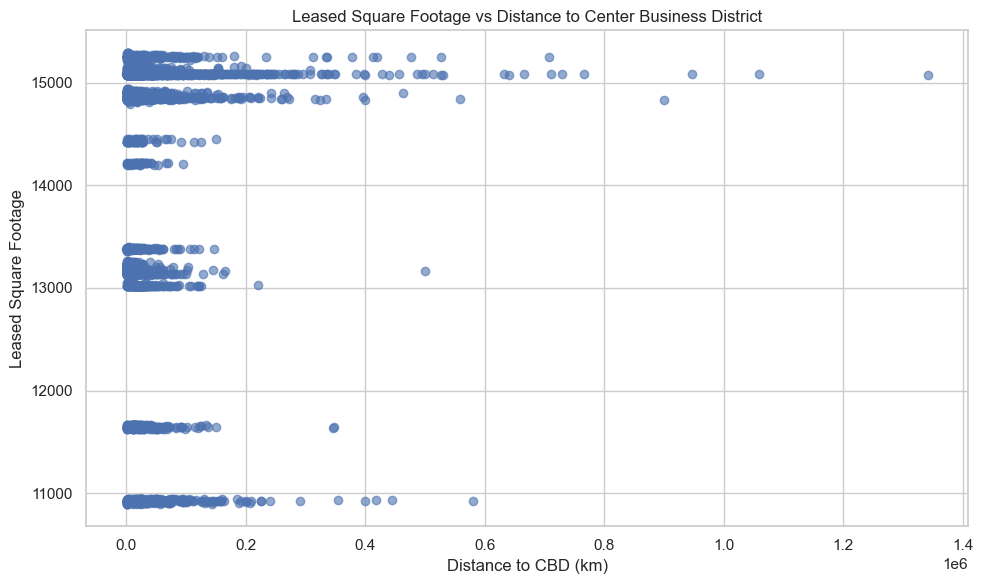

In [643]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(data['leasedSF'], data['cbd_dist_km'], alpha=0.6)
plt.title('Leased Square Footage vs Distance to Center Business District')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Leased Square Footage')
plt.grid(True)
plt.tight_layout()
plt.show()


In [631]:
# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=4)

## Decision Tree

In [632]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [633]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})

# Sort them from most important to least important
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                    feature  importance
2                  leasedSF    0.999462
0  internal_industry_mapped    0.000538
1                      year    0.000000
3       internal_class_Code    0.000000


In [684]:
# Define the mapping manually for subset of main industries
industry_map = {
    'Legal Services': 1,
    'Technology, Advertising, Media, and Information': 2,
    'Financial Services and Insurance': 3
}

# Map your internal_industry column
leases['internal_industry_mapped'] = leases['internal_industry'].map(industry_map)

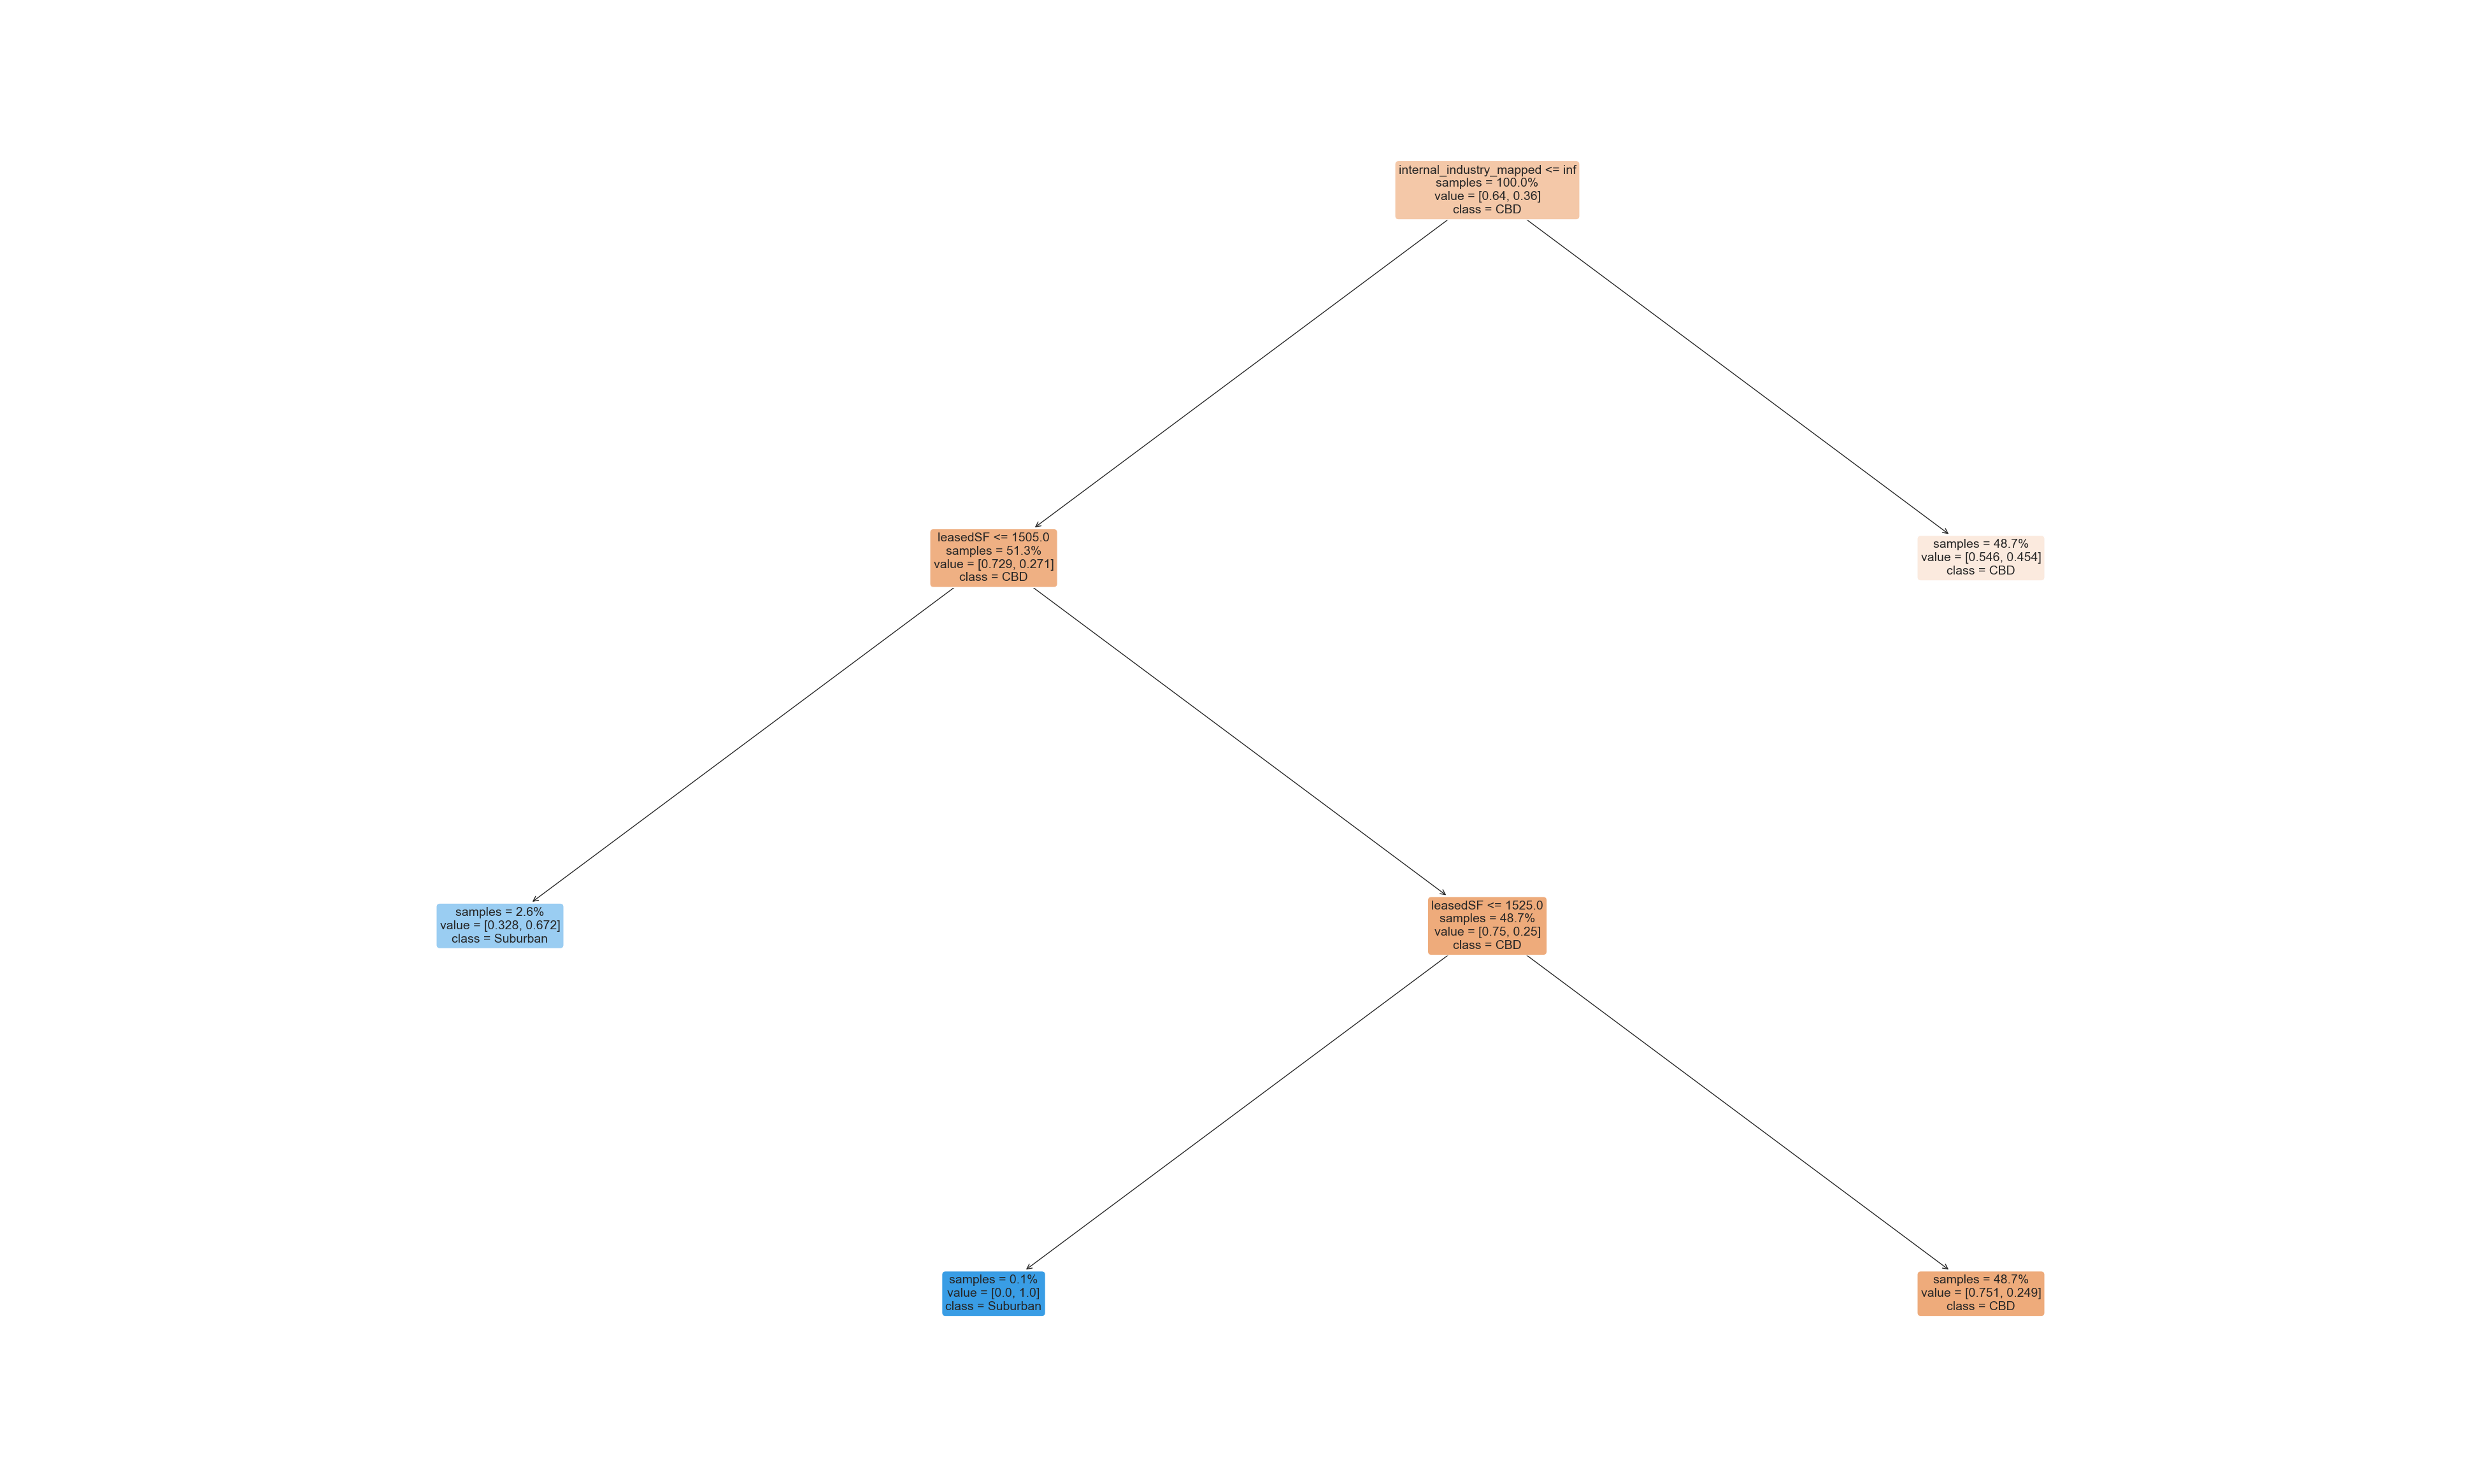

In [635]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
plot_tree(
    dt,
    feature_names=X_clean.columns.tolist(),
    class_names=['CBD', 'Suburban'],
    filled=True,
    rounded=True,
    fontsize=14,
    impurity=False,      
    proportion=True      
)
plt.show()


In [493]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_pred = logreg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")

# Classification report
print(classification_report(y_test, y_pred, target_names=['CBD', 'Suburban']))


Logistic Regression Accuracy: 72.52%
              precision    recall  f1-score   support

         CBD       0.73      1.00      0.84       731
    Suburban       0.00      0.00      0.00       277

    accuracy                           0.73      1008
   macro avg       0.36      0.50      0.42      1008
weighted avg       0.53      0.73      0.61      1008



/Users/allielynn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/allielynn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/allielynn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [494]:

# See the coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logreg.coef_[0]
})

print(coef_df)


                    feature   coefficient
0  internal_industry_mapped -5.081948e-07
1                      year -4.053381e-04
2                  leasedSF -6.178028e-06


In [351]:
cbd_counts

,year,CBD_suburban,count
0,2018,CBD,204
1,2018,Suburban,106
2,2019,CBD,201
3,2019,Suburban,98
4,2020,CBD,169
5,2020,Suburban,95
6,2021,CBD,206
7,2021,Suburban,111
8,2022,CBD,224
9,2022,Suburban,121


## Analyzing by Pre-Post Covid

In [403]:
eighteen = 204/ (204 + 106)
nineteen = 201 / (201+98)
twenty = 169 / (169+95)
twenty_one = 206 / (206+111)
twenty_two = 224 / (224+121)
twenty_three = 260 / (260+128)
twenty_four = 324 / (324 + 189)


In [411]:
from scipy import stats

# Pre-COVID percentages
pre_covid = [ 201 / (201+98), 169/(169+95)]

# Post-COVID percentages
post_covid = [  260 / (260+128), 324/(324+189)]

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(post_covid, pre_covid, alternative='greater')  # one-sided test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -0.2136
P-value: 0.5747


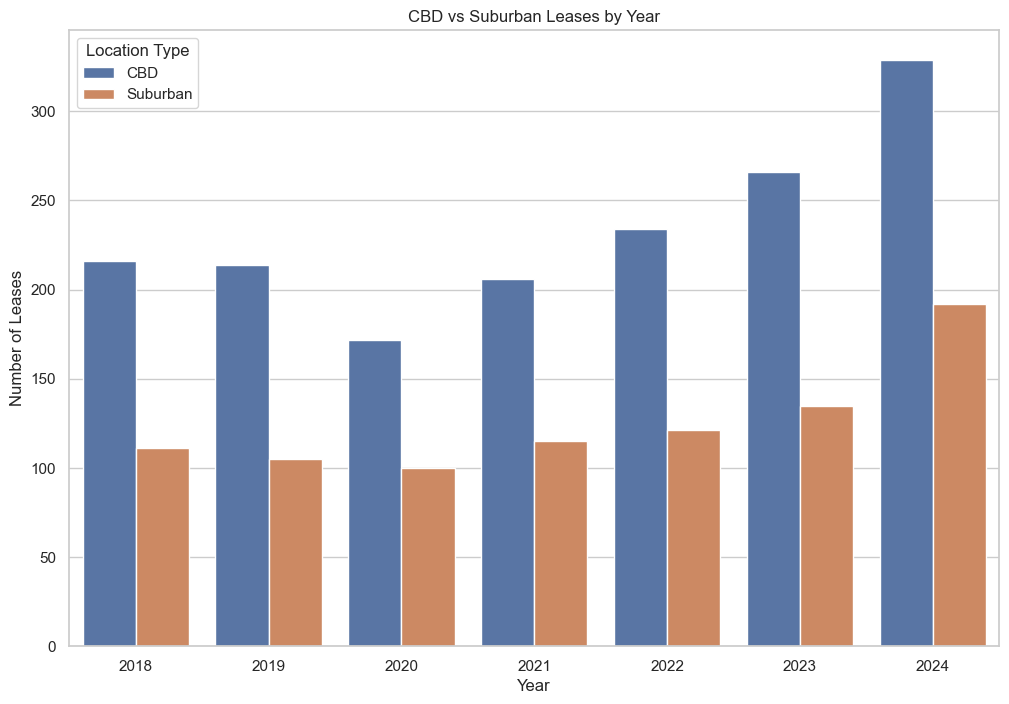

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(data=cbd_counts_legal, x='year', y='count', hue='CBD_suburban')
plt.title('CBD vs Suburban Leases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.legend(title='Location Type')
plt.show()


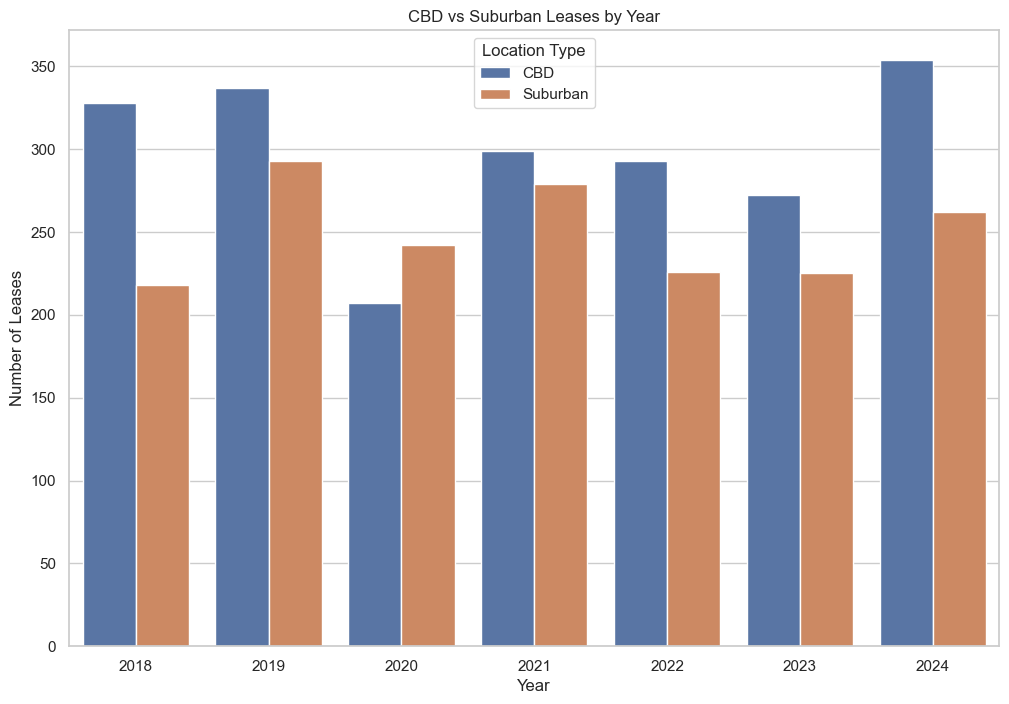

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(data=cbd_counts_tech, x='year', y='count', hue='CBD_suburban')
plt.title('CBD vs Suburban Leases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.legend(title='Location Type')
plt.show()

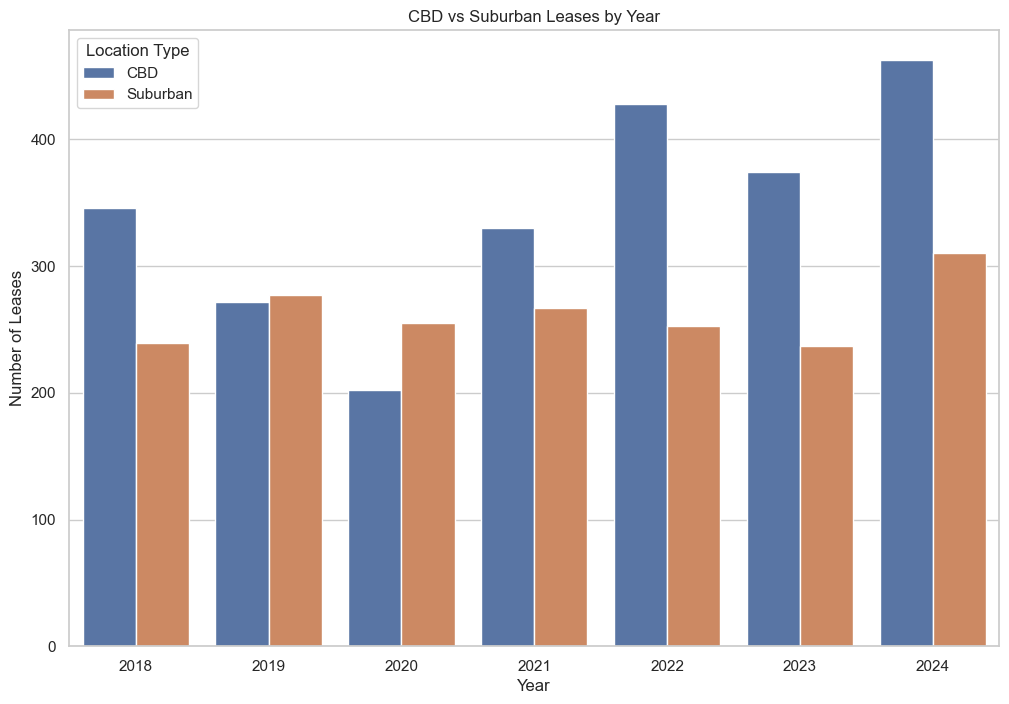

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(data=cbd_counts_finance, x='year', y='count', hue='CBD_suburban')
plt.title('CBD vs Suburban Leases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Leases')
plt.legend(title='Location Type')
plt.show()

In [356]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)


In [353]:
region_cbd_counts = leases.groupby(['region', 'year', 'CBD_suburban']).size().reset_index(name='count')

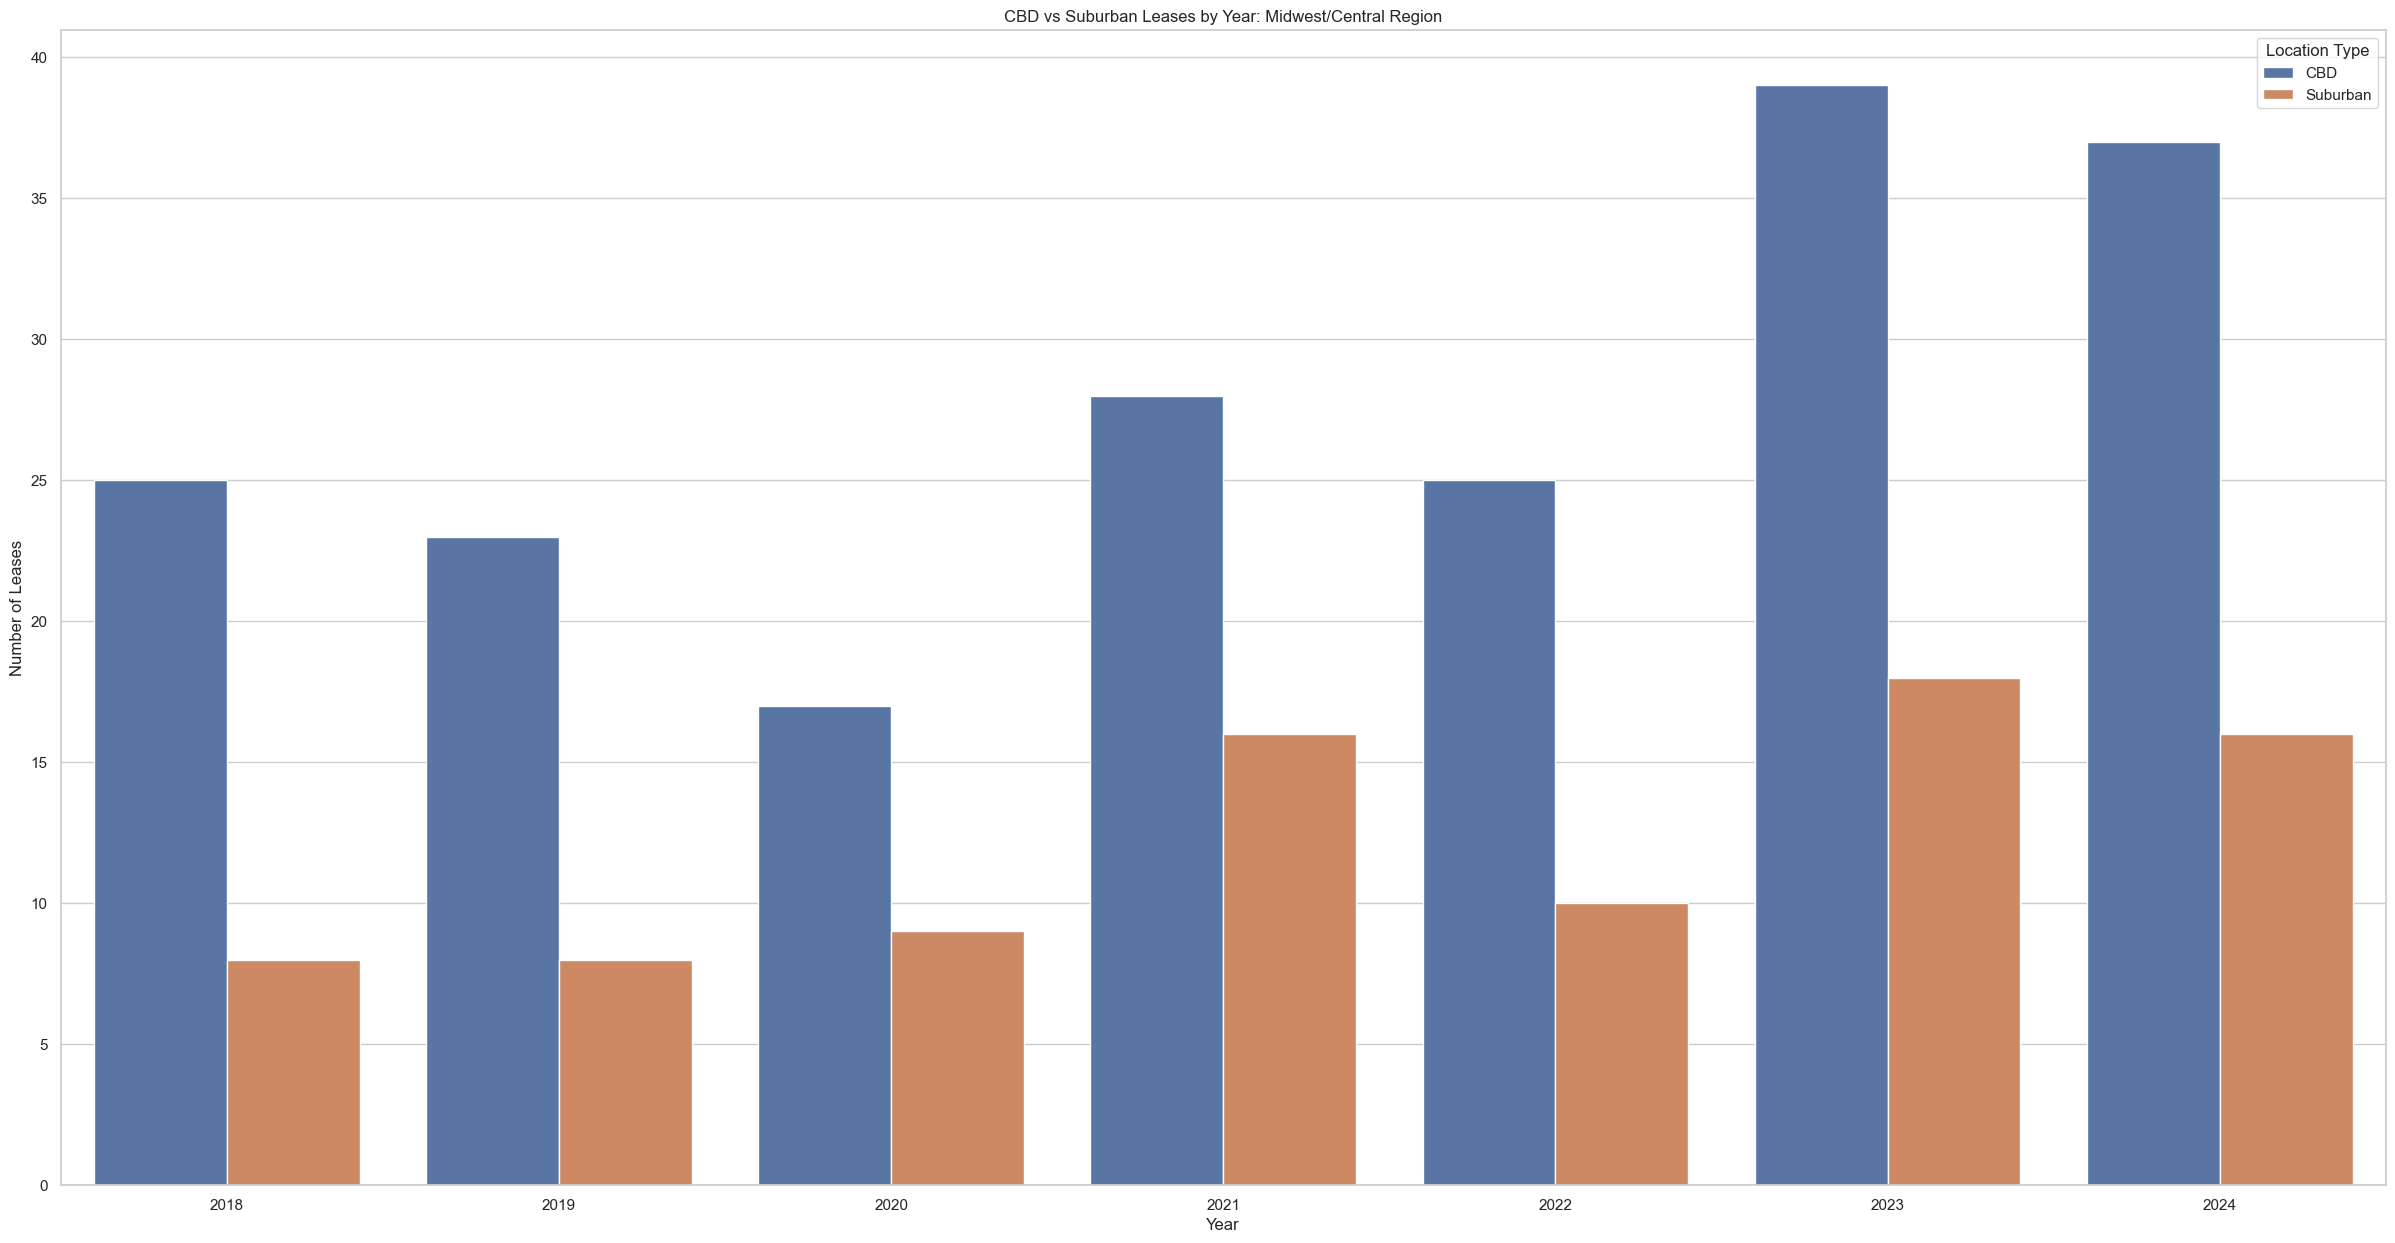

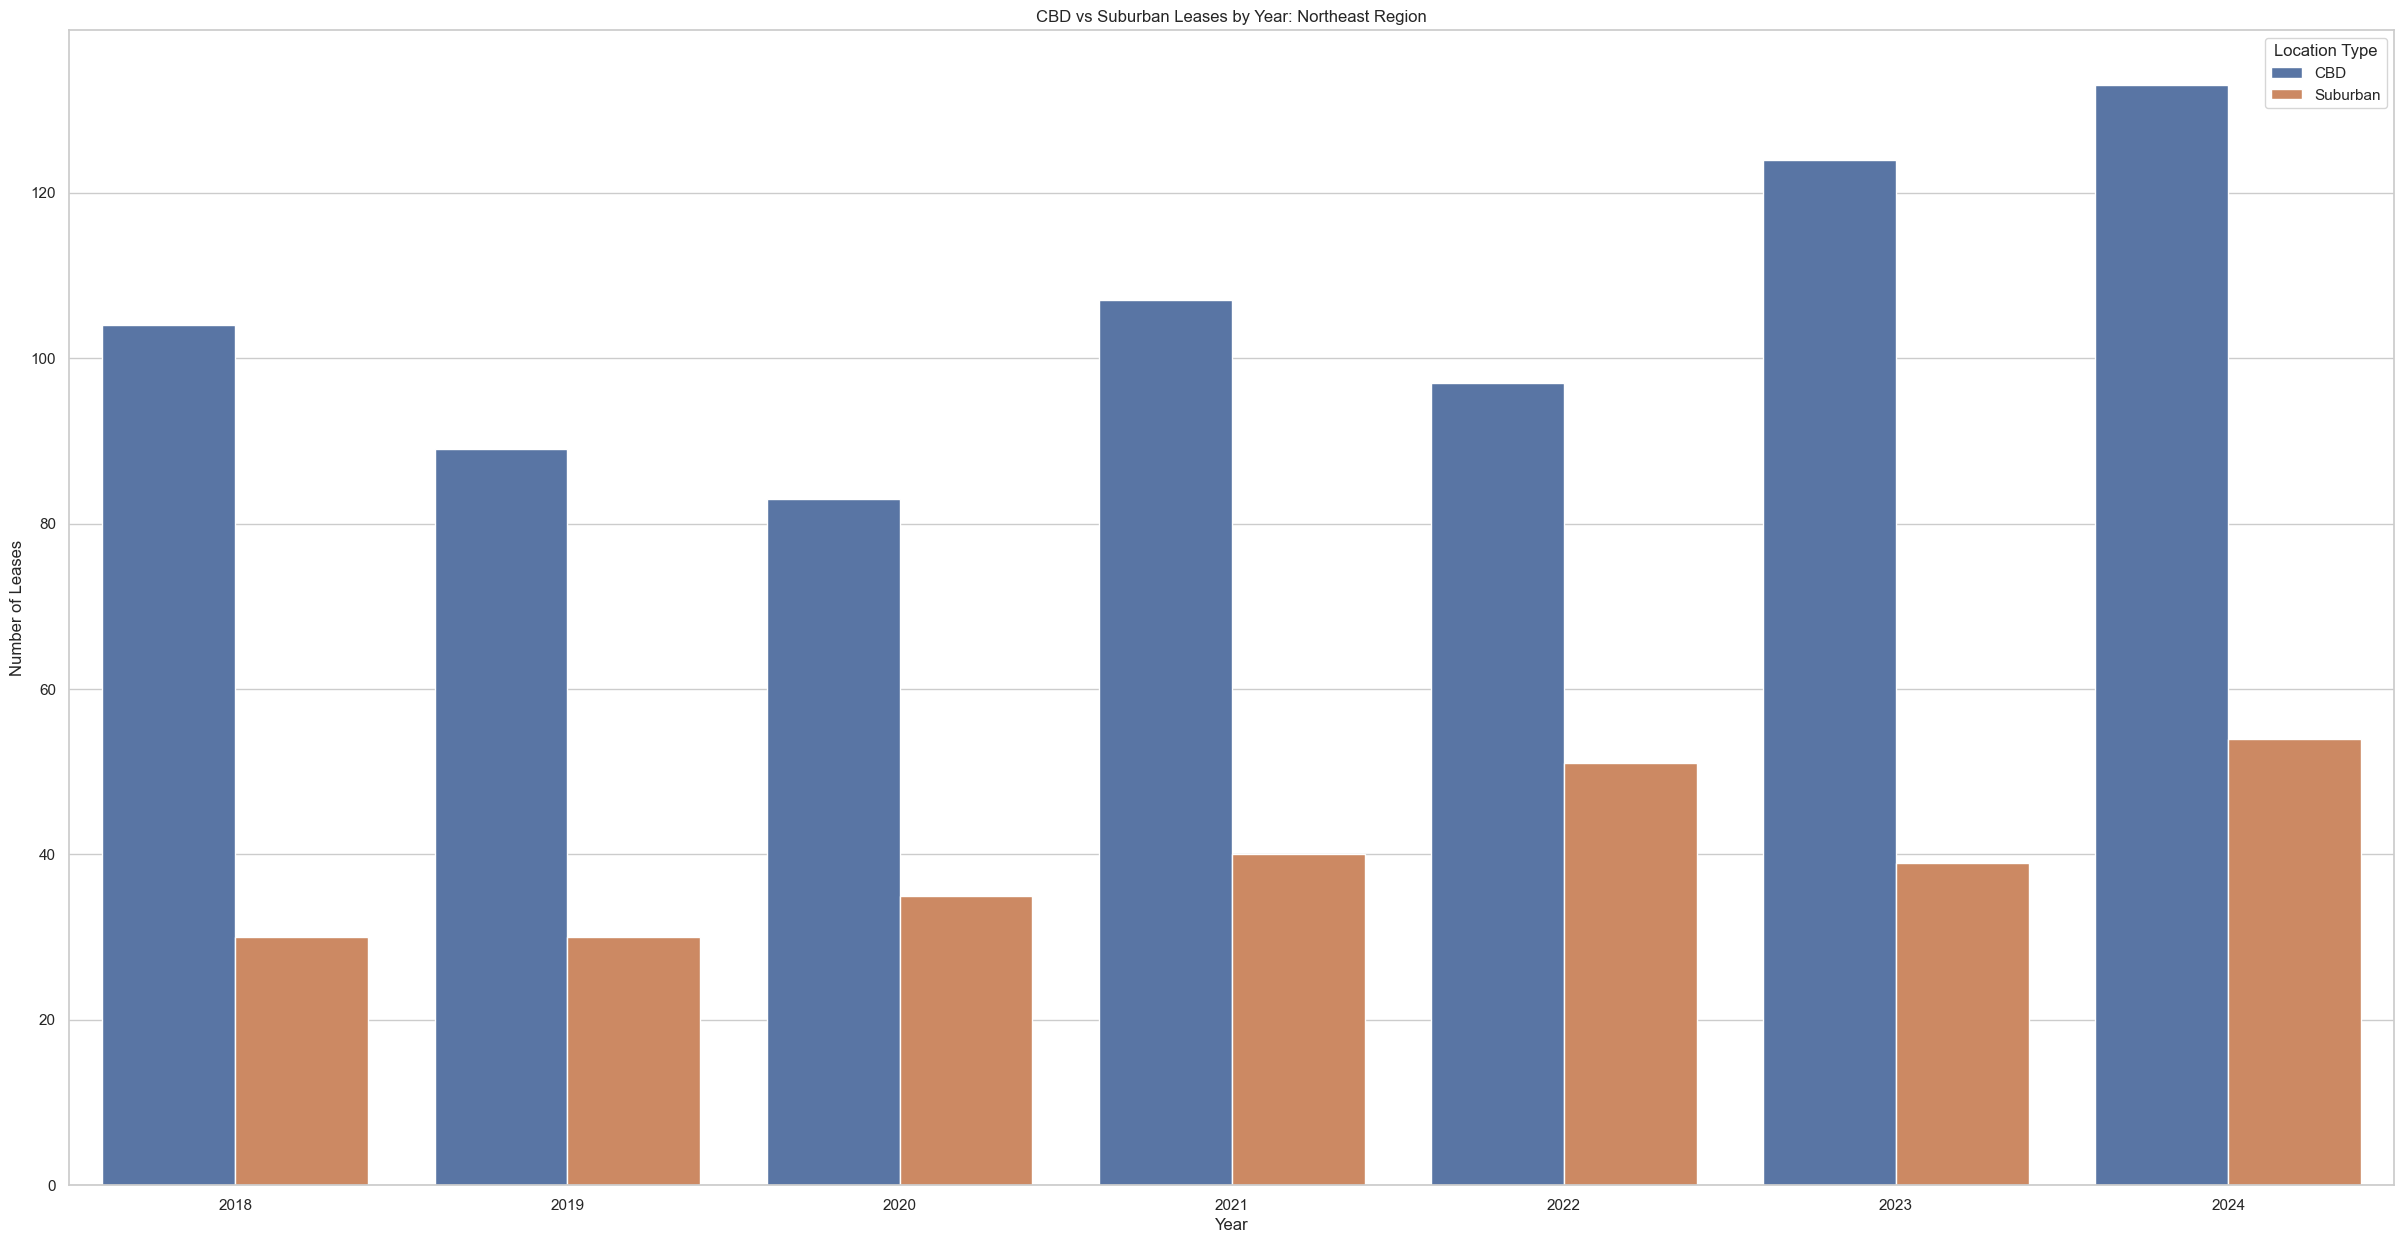

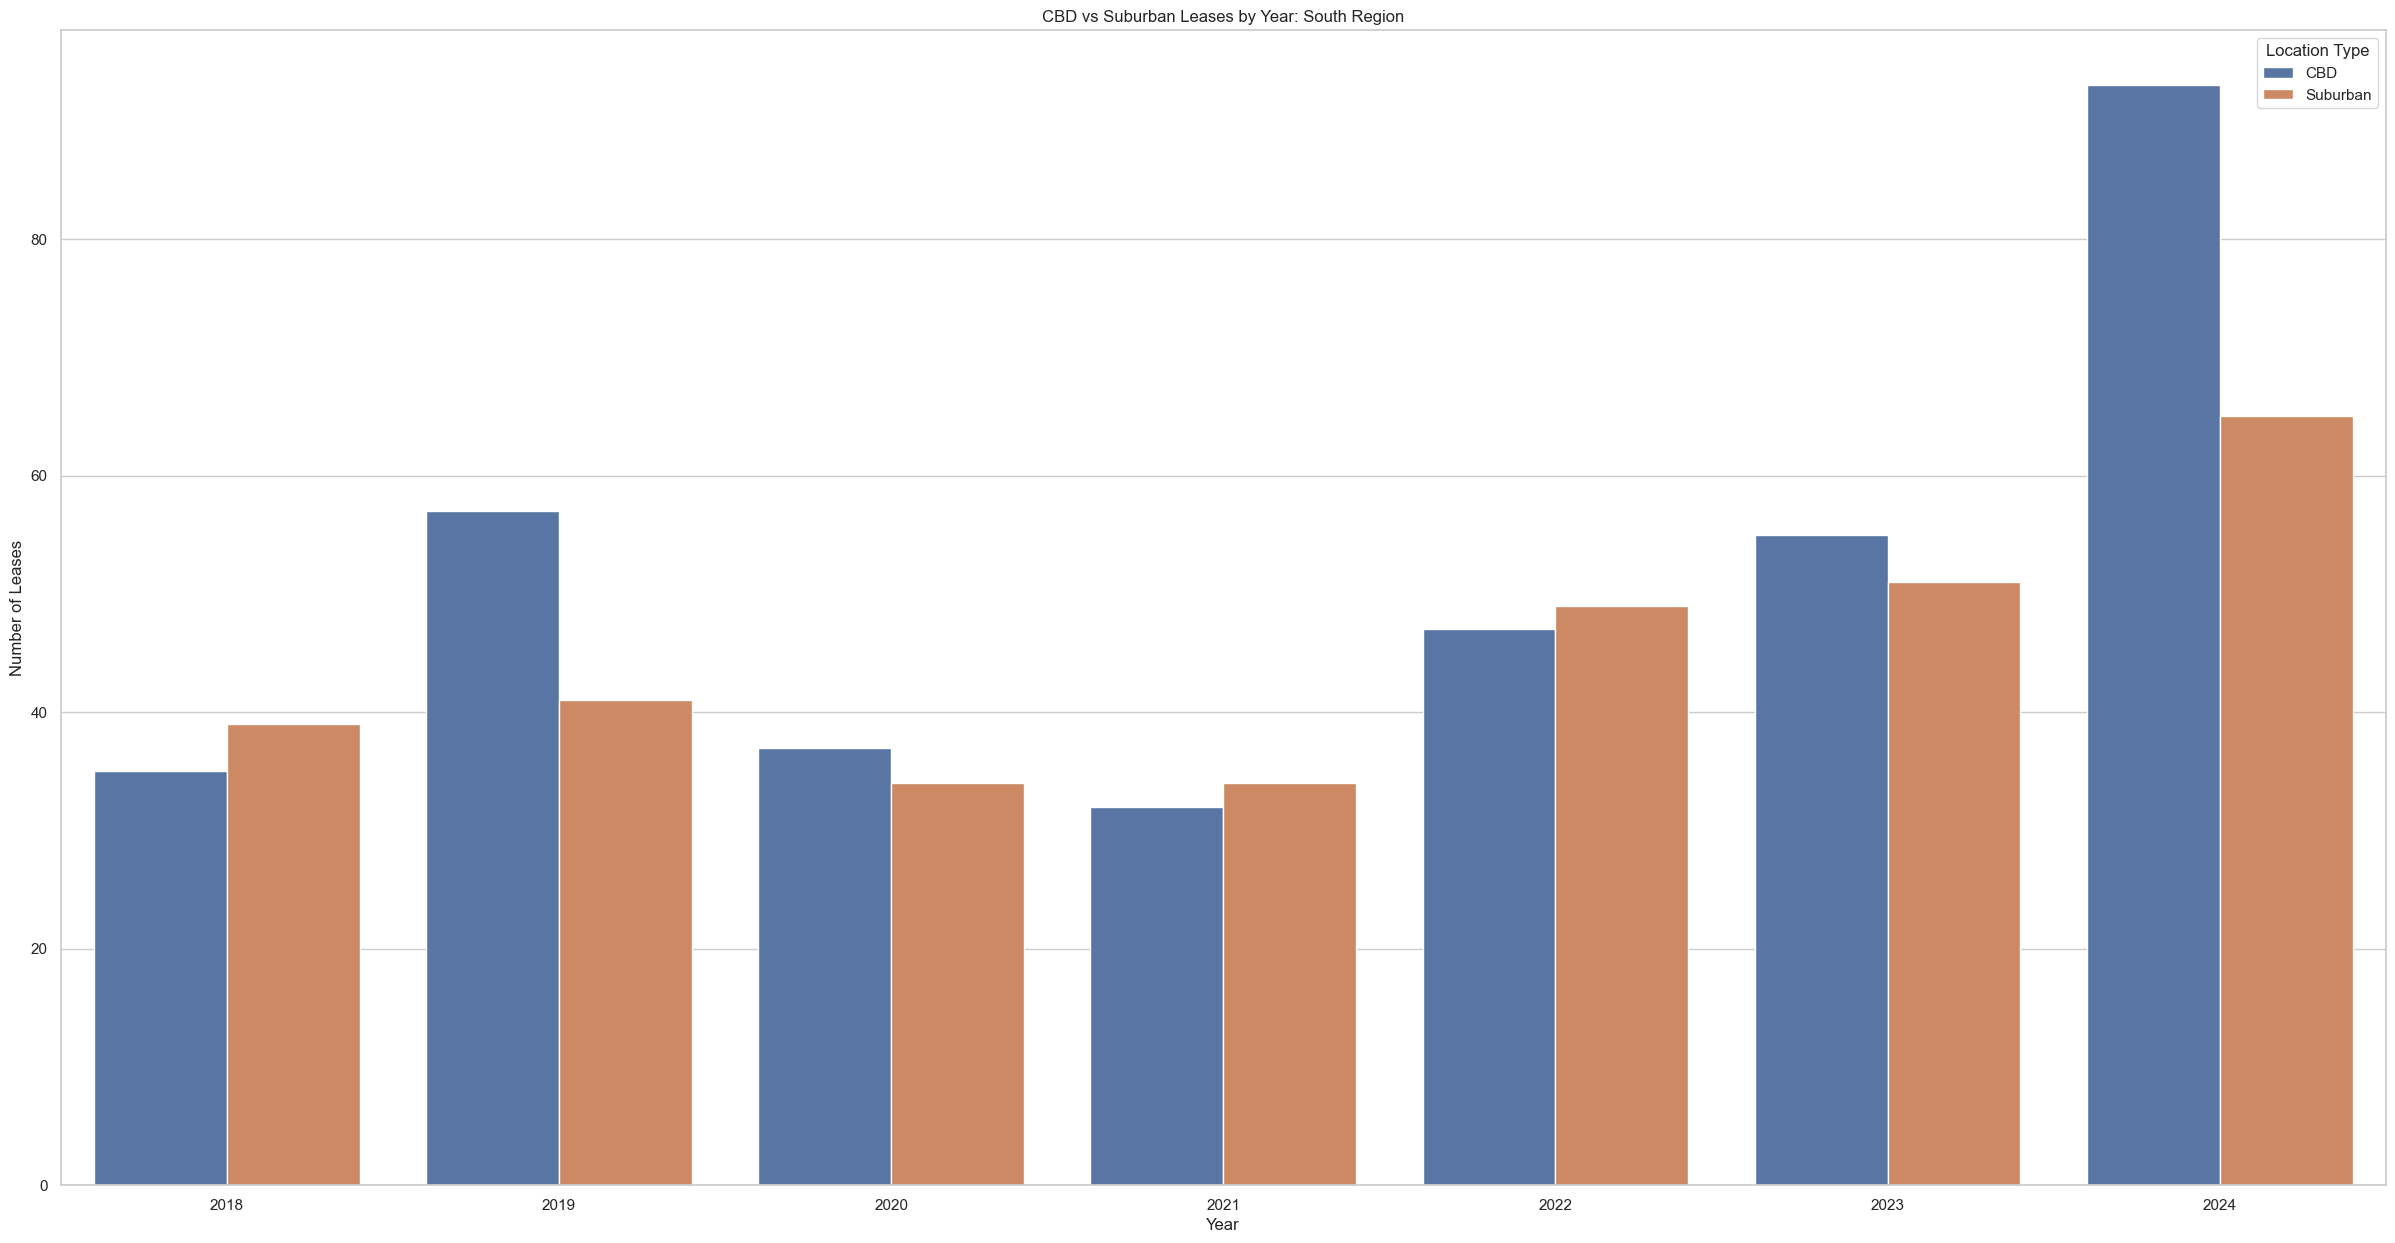

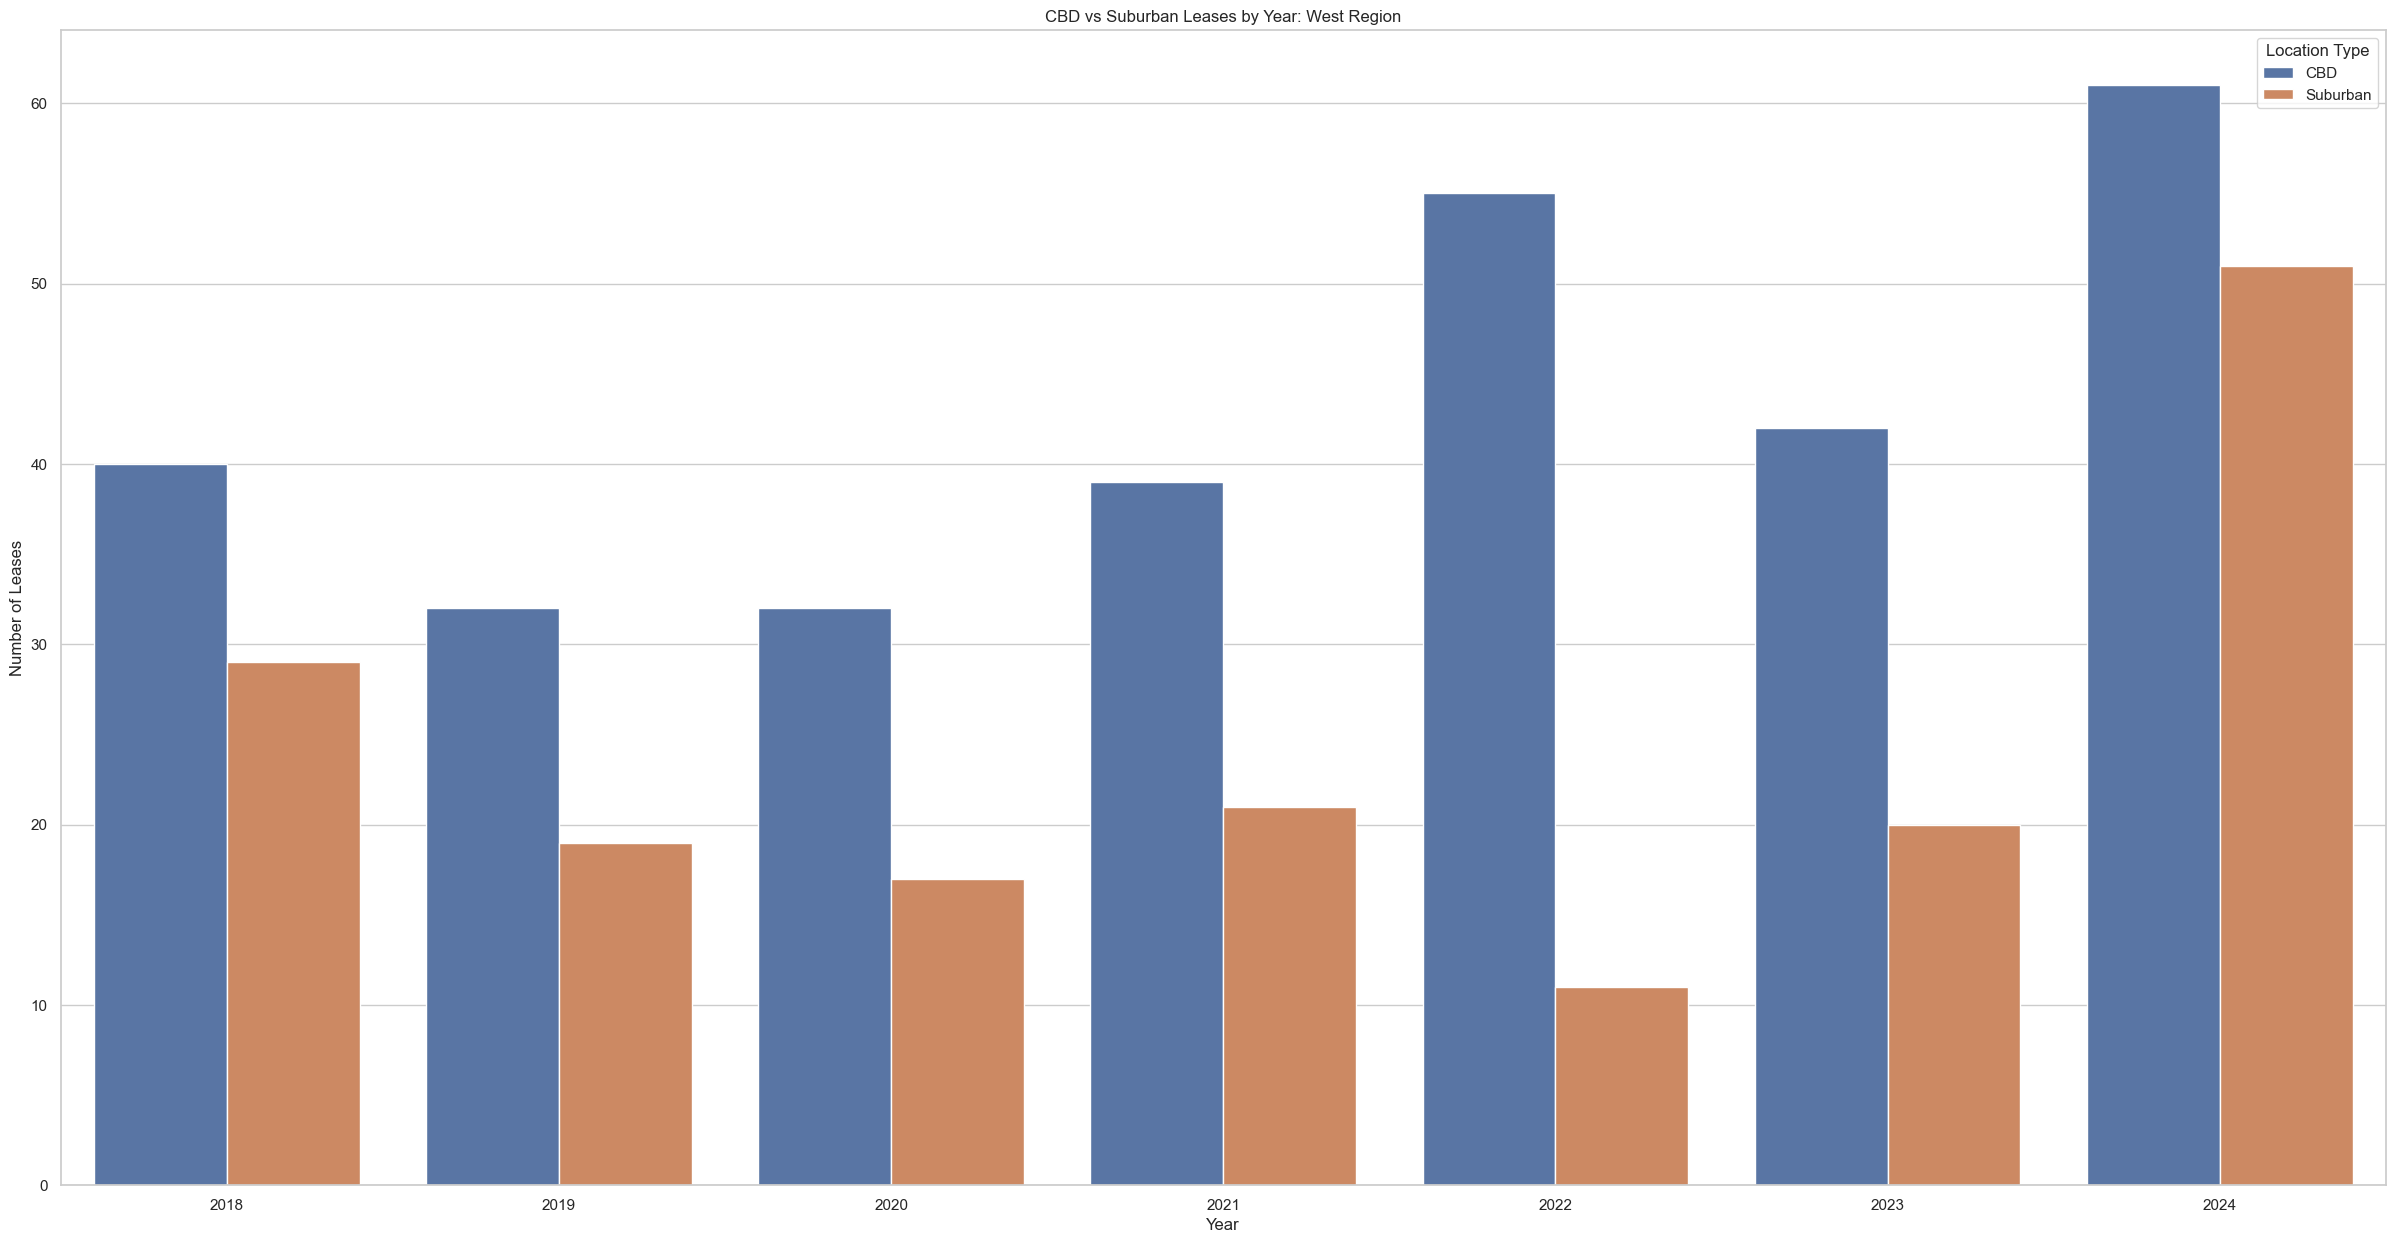

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create a list of unique regions
regions = region_cbd_counts['region'].unique()

# Plot
for reg in regions:
    plt.figure(figsize=(30,15))
    
    subset = region_cbd_counts[region_cbd_counts['region'] == reg]
    
    sns.barplot(data=subset, x='year', y='count', hue='CBD_suburban')
    
    plt.title(f'CBD vs Suburban Leases by Year: {reg} Region')
    plt.xlabel('Year')
    plt.ylabel('Number of Leases')
    plt.legend(title='Location Type')
    plt.show()


In [312]:
leases.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
106,2018,Q1,1.0,Austin,7600 Burnet,Austin_Central_Austin_7600 Burnet_7600 Burnet Rd,7600 Burnet Rd,South,Austin,TX,...,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674.0
125,2018,Q1,1.0,Austin,Franklin Square,Austin_West Central_Austin_Franklin Square_372...,3724 Jefferson St,South,Austin,TX,...,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674.0
380,2018,Q1,1.0,Charlotte,Johnston Building,Charlotte_CBD_Charlotte_Johnston Building_212 ...,212 S Tryon St,South,Charlotte,NC,...,26.037735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172401.0
404,2018,Q1,1.0,Chicago,161 N Clark St,Chicago_Central Loop_Chicago_161 N Clark St_16...,161 N Clark St,Midwest/Central,Chicago,IL,...,39.949176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990909.0
405,2018,Q1,1.0,Chicago,161 W Washington St,Chicago_Central Loop_Chicago_161 W Washington ...,30 N LaSalle St,Midwest/Central,Chicago,IL,...,39.949176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1351932.0


# For Law only

In [301]:
tech = leases[leases['internal_industry'] == 'Technology, Advertising, Media, and Information']

In [302]:
tech = tech.dropna()

In [228]:
# features
X2 = tech.drop(['region','state','go_transaction','transaction_type','market','internal_submarket','internal_market_cluster', 'costarID','city','quarter', 'internal_industry', 'company_name', 'zip', 'address', 'building_name', 'building_id', 'monthsigned', 'quarter'], axis=1)
y2 = 

In [229]:
X2 = pd.get_dummies(X2)

In [230]:
# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=4)

In [247]:
print(y2.value_counts())

go_transaction
1    426
0    219
Name: count, dtype: int64


In [212]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [213]:
feature_importances = pd.DataFrame({
    'feature': X2.columns,
    'importance': dt.feature_importances_
})

# Sort them from most important to least important
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                           feature  importance
1                         leasedSF    0.670910
19                space_type_Relet    0.273431
14             sublet_overall_rent    0.088175
7           direct_available_space    0.048821
0                             year    0.000000
12  sublet_availability_proportion    0.000000
21                CBD_suburban_CBD    0.000000
20               space_type_Sublet    0.000000
18                  space_type_New    0.000000
17                internal_class_O    0.000000
16                internal_class_A    0.000000
13      sublet_internal_class_rent    0.000000
11          sublet_available_space    0.000000
10             direct_overall_rent    0.000000
9       direct_internal_class_rent    0.000000
8   direct_availability_proportion    0.000000
6                     overall_rent    0.000000
5              internal_class_rent    0.000000
4          availability_proportion    0.000000
3                  available_space    0.000000
2            

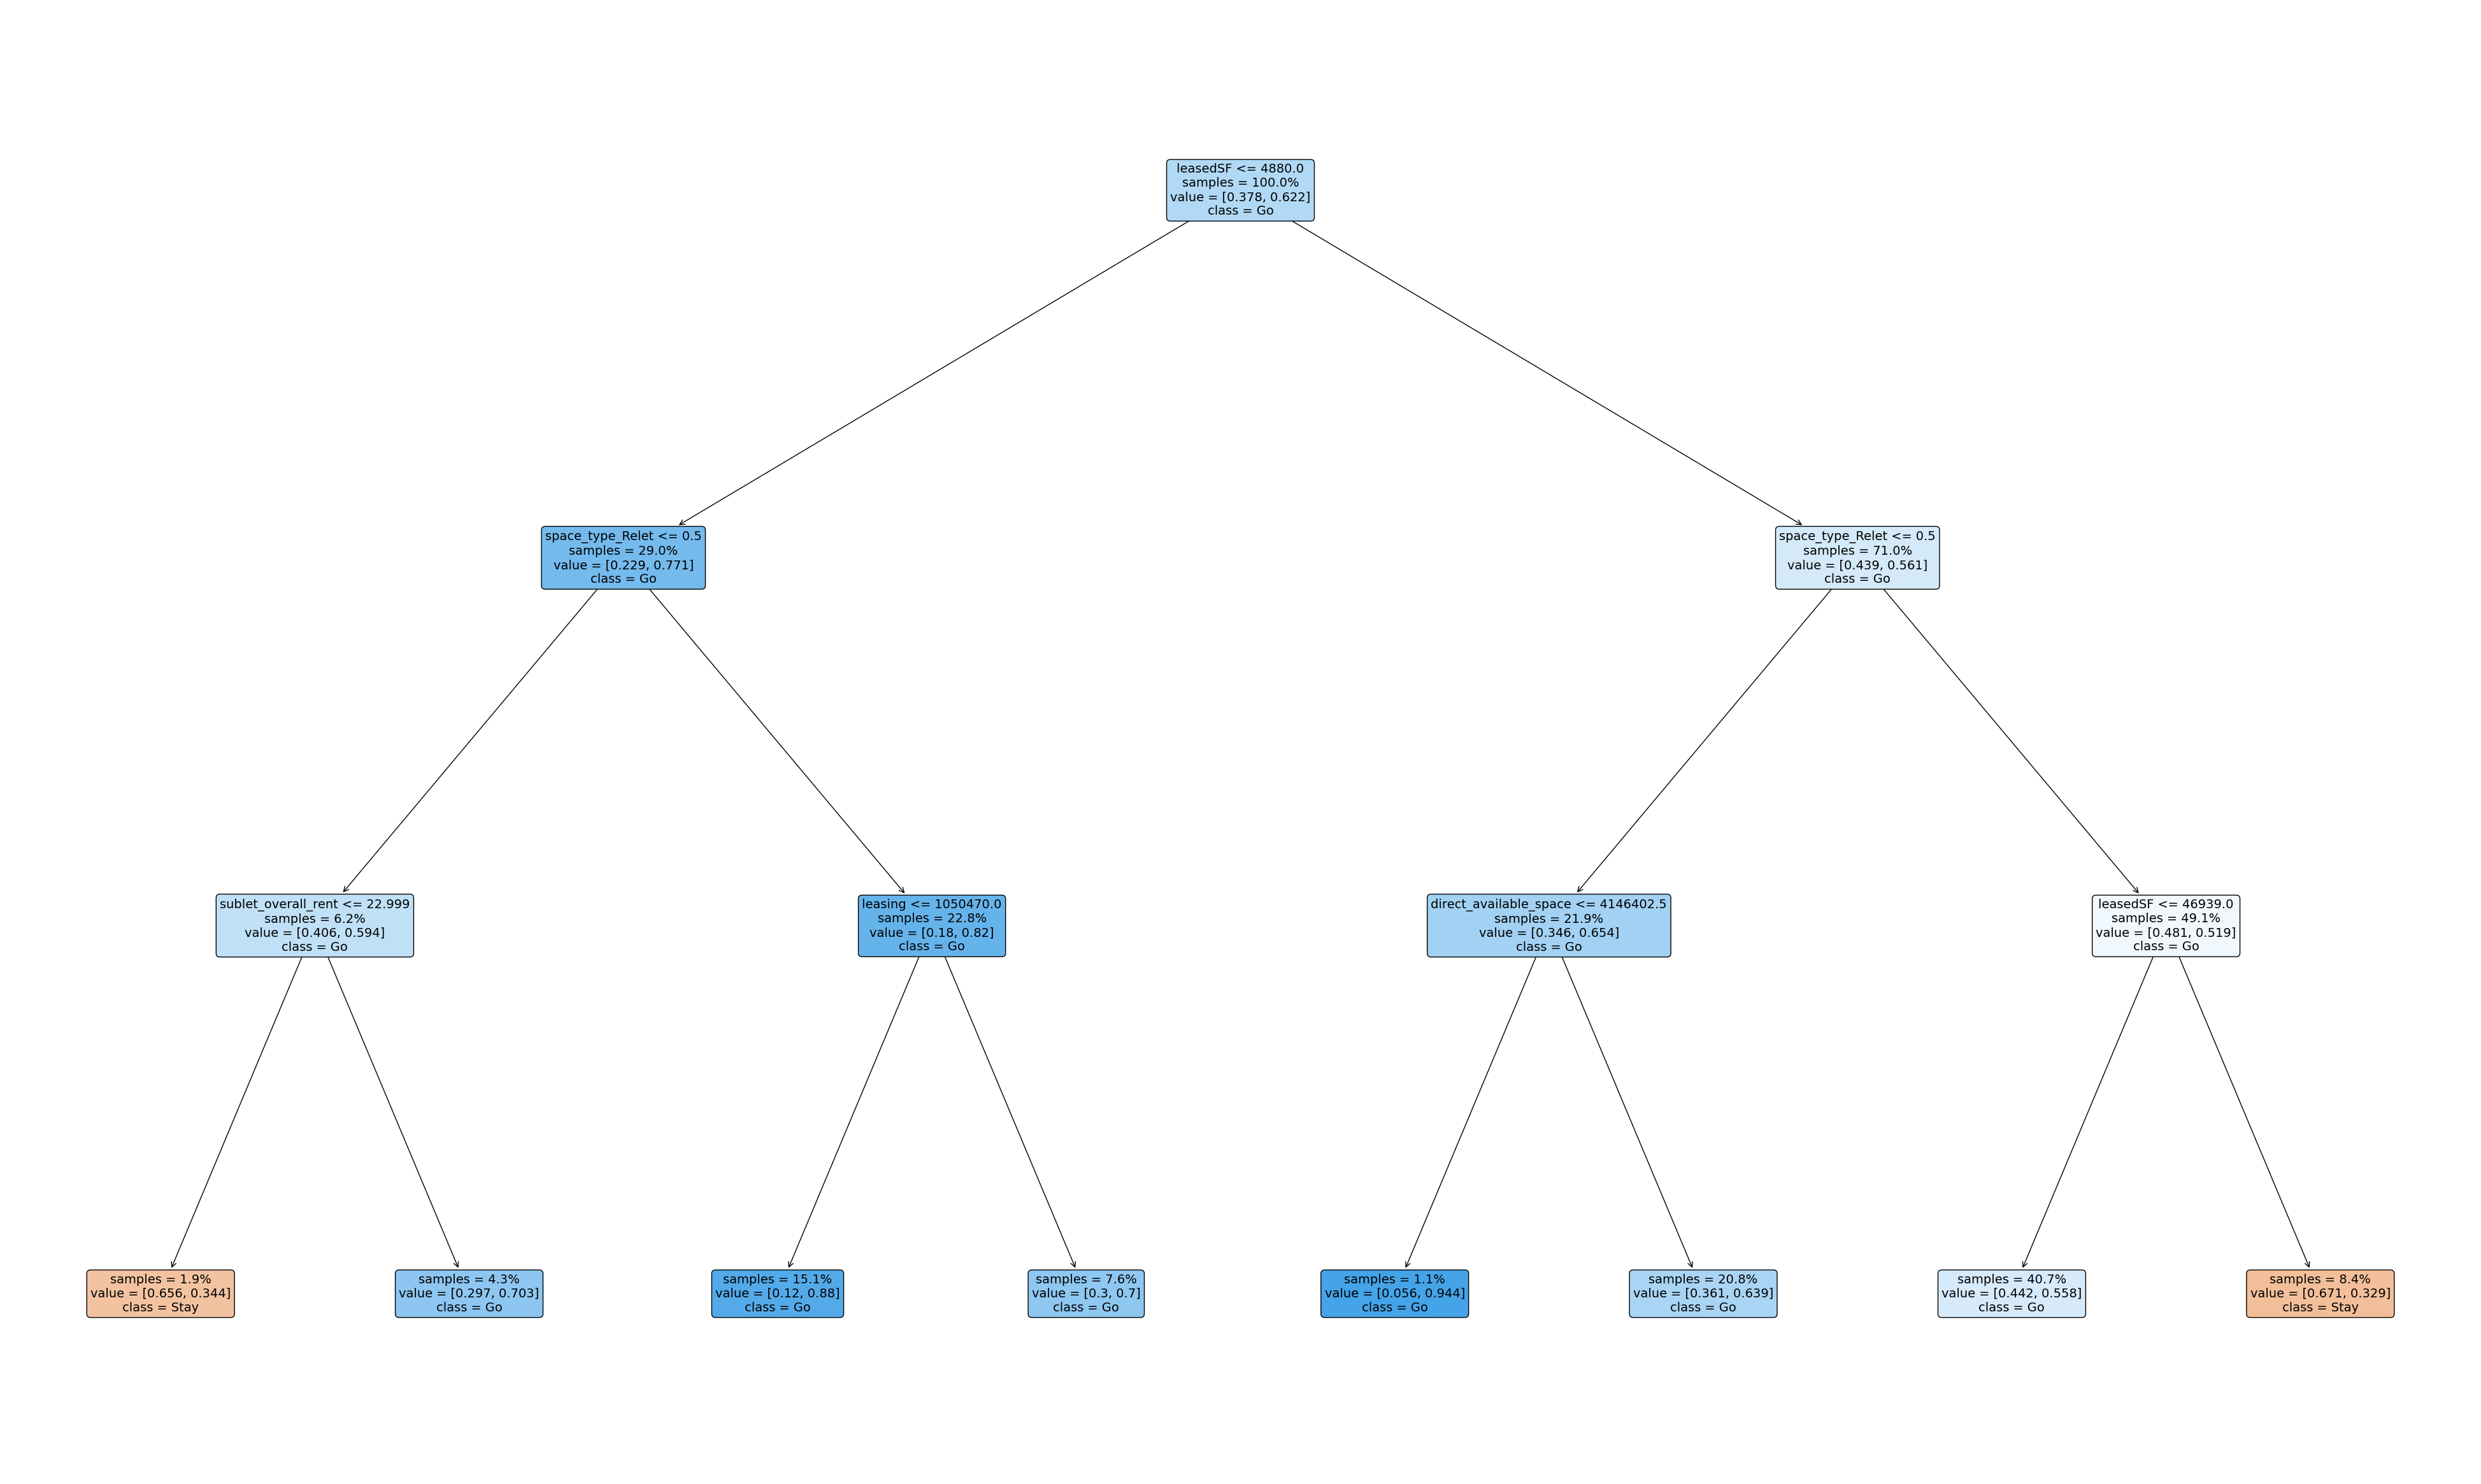

In [214]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
plot_tree(
    dt,
    feature_names=X.columns.tolist(),
    class_names=['Stay', 'Go'],
    filled=True,
    rounded=True,
    fontsize=14,
    impurity=False,     
    proportion=True    
)
plt.show()


In [215]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {accuracy:.2%}")

Prediction Accuracy: 68.22%


# Log Reg

In [231]:
# Select only the important columns
X_selected = X2[['leasedSF', 'space_type_Relet', 'sublet_overall_rent', 'direct_available_space']]

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.3, random_state=42)


In [234]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [235]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_pred = logreg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")

# Classification report
print(classification_report(y_test, y_pred, target_names=['Stay', 'Go']))


Logistic Regression Accuracy: 65.98%
              precision    recall  f1-score   support

        Stay       0.47      0.22      0.30        64
          Go       0.70      0.88      0.78       130

    accuracy                           0.66       194
   macro avg       0.58      0.55      0.54       194
weighted avg       0.62      0.66      0.62       194



In [236]:
import pandas as pd

# See the coefficients
coef_df = pd.DataFrame({
    'feature': X_selected.columns,
    'coefficient': logreg.coef_[0]
})

print(coef_df)


                  feature   coefficient
0                leasedSF -1.043848e-05
1        space_type_Relet  6.191345e-11
2     sublet_overall_rent  2.958213e-09
3  direct_available_space  2.658669e-08


# QDA

In [241]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

features_to_plot = ['leasedSF', 'space_type_Relet']
X_selected2 = X2[features_to_plot]

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_selected2, y2, test_size=0.3, random_state=42)

# Fit QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


QuadraticDiscriminantAnalysis()

/Users/allielynn/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


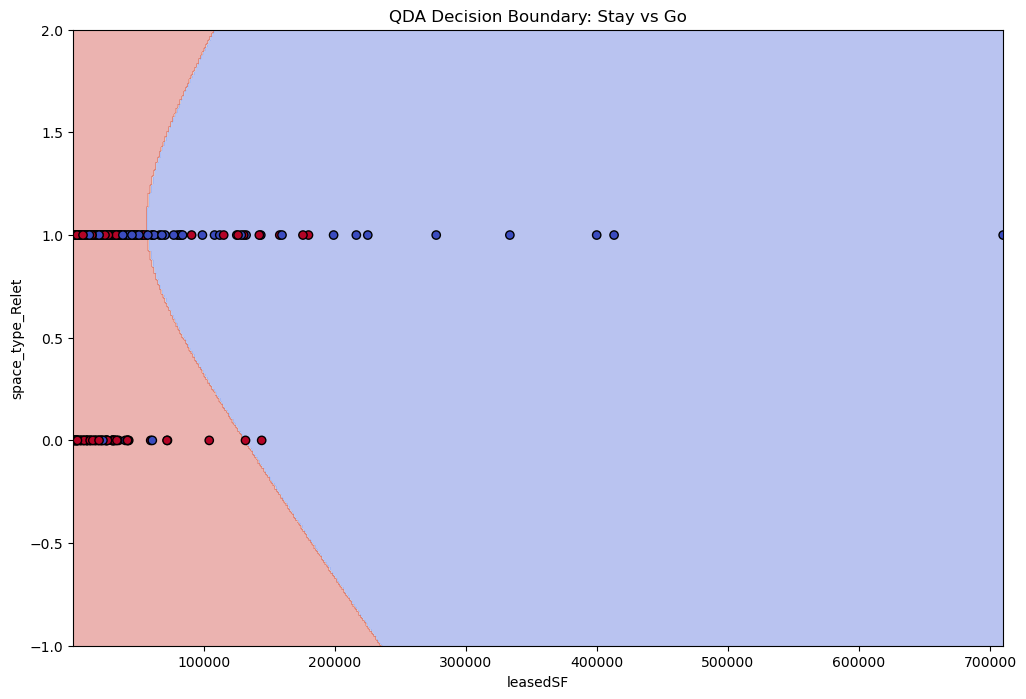

In [242]:
# Create meshgrid
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over grid
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Scatter plot the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')

plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title('QDA Decision Boundary: Stay vs Go')
plt.show()
